<a href="https://colab.research.google.com/github/DanielRaiicHu/clasificacion_validacion_y_metricas/blob/main/Clasificacion_validacion_y_metricas.ipynb?forceRefresh=true">
  <img src="https://drive.google.com/uc?export=view&id=191Woxwut0iaIL2hCcCIeXRSB6oba_88H" alt="Abrir en Colab" width="120"/>
</a>

# <font color='dark'>**Clasificaci√≥n: Validaci√≥n de modelos y m√©tricas de evaluaci√≥n**</h1>

### Proyecto

Una empresa de financiamiento de autom√≥viles est√° atravesando una situaci√≥n complicada, con una alta demanda para una flota reducida de veh√≠culos y un alto n√∫mero de morosos, lo que est√° generando grandes p√©rdidas para la empresa.

Nosotros fuimos contratados para buscar mejoras en la identificaci√≥n de morosos. El an√°lisis de los clientes actualmente se realiza de forma manual, cliente por cliente, lo que consume mucho tiempo y, aun as√≠, la detecci√≥n de morosos es muy imprecisa.

Nuestra tarea es utilizar los datos proporcionados por la empresa para **clasificar** a los clientes en cumplidores y morosos.

## <font color='dark'>1. Clasificando los datos</h1>

### Creando un modelo inicial

In [555]:
import pandas as pd

In [556]:
url = 'https://raw.githubusercontent.com/DanielRaiicHu/clasificacion_validacion_y_metricas/main/prestacar.csv'
datos = pd.read_csv(url)
datos.head()


ingresos_cliente  anualidad_prestamo  a√±os_casa_propia  telefono_trab  \
0           12600.0         3569.400000         12.157324              1   
1            9000.0         2722.188351          7.000000              0   
2           15750.0         4477.500000         12.000000              0   
3            9000.0         1309.050000         12.157324              0   
4            7650.0         1125.000000         12.157324              0   

   evaluacion_ciudad   score_1   score_2   score_3  score_social  \
0                2.0  0.057153  0.527227  0.513171      0.117428   
1                2.0  0.657661  0.285898  0.614414      0.222700   
2                2.0  0.501213  0.695423  0.513171      0.117428   
3                3.0  0.501213  0.155973  0.513171      0.117428   
4                2.0  0.294328  0.152076  0.513171      0.117428   

   cambio_telefono  moroso  
0           2545.0       0  
1            495.0       0  
2           1212.0       0  
3            515.0       0  
4            162.0       0

In [557]:
# Separa los datos en variables predictoras (X) y variable objetivo (y)
X = datos.drop(columns='moroso', axis=1)  # X contiene todas las columnas excepto 'moroso'
y = datos.moroso  # y contiene la columna objetivo: si el cliente es moroso

In [558]:
from sklearn.tree import DecisionTreeClassifier  # Importa el modelo de √°rbol de decisi√≥n

modelo = DecisionTreeClassifier()  # Instancia un modelo vac√≠o de √°rbol de decisi√≥n
modelo.fit(X, y)  # Entrena el modelo con los datos completos (sin separar en test/train)
modelo.score(X, y)  # Calcula la exactitud sobre los mismos datos usados para entrenar

1.0

In [559]:
# Imprime el resultado de la exactitud
print(f'La exactitud del modelo es: {modelo.score(X,y)}')
# Resultado esperado: La exactitud del modelo es: 1.0

# Eso se debe a que el modelo se memoriz√≥ todos los casos posibles, pero no es lo m√°s recomendable
# Haciendo esto, en el caso de trabajar con un √°rbol de decisi√≥n, siempre va a dar un 100%

La exactitud del modelo es: 1.0


**An√°lisis del c√≥digo:**

**¬øQu√© se hizo?**

* Se carg√≥ un dataset sobre morosidad de clientes.

* Se entren√≥ un modelo de clasificaci√≥n (DecisionTreeClassifier) con todos los datos disponibles.

* Se calcul√≥ su exactitud usando los mismos datos de entrenamiento.

**¬øQu√© se identific√≥?**

* La exactitud fue 1.0 (100%), lo cual indica sobreajuste: el modelo memoriz√≥ los datos.

* Este resultado no es confiable, ya que no representa la capacidad real del modelo para predecir datos nuevos.

**¬øQu√© se puede hacer?**

* Separar los datos en conjuntos de entrenamiento y prueba, o usar validaci√≥n cruzada.

* As√≠, se puede verificar si el modelo realmente aprende patrones generales y no solo memoriza.

**Conclusi√≥n:**

* Evaluar el modelo con los mismos datos que se usaron para entrenar no permite medir su capacidad de generalizaci√≥n.

* Esto equivale a evaluar a una persona con las mismas preguntas del examen que ya estudi√≥ con respuestas incluidas.

* Por eso es fundamental dividir los datos (como en la imagen adjunta) en:

>* Entrenamiento: para aprender.
>
>* Validaci√≥n: para comparar modelos/hyperpar√°metros.
>
>* Prueba: para evaluar la capacidad final de predicci√≥n en datos nunca vistos.

### Validando el modelo

Evaluar el modelo con los mismos datos utilizados en el entrenamiento no es recomendable. Es necesario que la evaluaci√≥n se realice con datos independientes.  

Evaluar el modelo con los propios datos de entrenamiento ser√≠a equivalente a entregar un examen con las preguntas y las respuestas a una persona y, al momento de evaluarla nuevamente, entregarle un examen con las mismas preguntas y opciones. Se espera que esa persona obtenga un buen resultado, ya que ya ha visto las respuestas y ha memorizado el resultado. Esto es diferente de haber aprendido la materia a partir de ese examen y luego presentar una prueba con contenido similar y obtener un resultado positivo.  

Con el objetivo de verificar la capacidad de generalizaci√≥n de un modelo, debemos dividir el conjunto de datos en tres partes: datos de entrenamiento, validaci√≥n y prueba.  

- El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.  

- El **conjunto de validaci√≥n** se emplea para evaluar el desempe√±o de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.  

- El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validaci√≥n, sirviendo como una estimaci√≥n de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

<a href="https://ibb.co/9H2Z1HZ5"><img src="https://i.ibb.co/0yZs6ysb/datos-train-test.png" alt="datos-train-test" border="0"></a>

In [560]:
# Separa en base de entrenamiento y en base de prueba
from sklearn.model_selection import train_test_split

In [561]:
# test_size = 0.15: El 15% de los datos ser√° para prueba
# stratify: para dejar la misma cantidad de observaciones para morososo, para los 2 conjuntos que estoy separando (Mantiene la proporci√≥n original de clases (moroso/no moroso))
# ejemplo: si en mi conjunto de prueba tengo un 10% de morosos, quiero que mi conjunto de entrenamiento tambi√©n tenga un 10% de morosos
# random_state = 5: replica esta misma divisi√≥n en cualquier momento y de la misma forma

# Divisi√≥n inicial entre conjunto general y conjunto de prueba (15% para prueba)
X, X_test,y,y_test = train_test_split(X,y,test_size= 0.15, stratify = y, random_state = 5)

# Divisi√≥n secundaria: entrenamiento vs validaci√≥n (por defecto 75% entrenamiento, 25% validaci√≥n)
# (Por defecto el tama√±o es del 25%) Conjunto de entrenamiento y validaci√≥n
X_train, X_val,y_train,y_val = train_test_split(X,y, stratify = y, random_state = 5)

In [562]:
# Instanciar el modelo
# Sin l√≠mites en el √Årbol de Decisi√≥n
modelo = DecisionTreeClassifier()       # Crea modelo sin restricci√≥n de profundidad
modelo.fit(X_train,y_train)             # Entrena con los datos de entrenamiento
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validaci√≥n es de: {modelo.score(X_val,y_val)}')

# Respuesta:
# La exactitud del modelo con el conjunto de entrenamiento es de: 1.0
# La exactitud del modelo con el conjunto de validaci√≥n es de: 0.8495775629300584

# Esta no es la mejor forma de instanciar un modelo de √°rbol de decisi√≥n, sino que debemos colocar una profundidad con max_depth

La exactitud del modelo con el conjunto de entrenamiento es de: 1.0
La exactitud del modelo con el conjunto de validaci√≥n es de: 0.8470516505530877


In [563]:
# Instanciar el modelo
# Con delimitaci√≥n en el √Årbol de Decisi√≥n
modelo = DecisionTreeClassifier(max_depth=10) # L√≠mite de profundidad = 10
modelo.fit(X_train,y_train)                   # Vuelve a entrenar
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validaci√≥n es de: {modelo.score(X_val,y_val)}')

# Respuesta:
# La exactitud del modelo con el conjunto de entrenamiento es de: 0.9206445993031359
# La exactitud del modelo con el conjunto de validaci√≥n es de: 0.905496036930581

# Vemos que est√° generalizando mejor, porque no se est√° memorizando todas las salidas y √∫nicamente ajustamos un par√°metro.
# Entonces aqu√≠ ya comenzamos a encontrar el camino para poder hacer nuestra validaci√≥n del modelo

La exactitud del modelo con el conjunto de entrenamiento es de: 0.9206445993031359
La exactitud del modelo con el conjunto de validaci√≥n es de: 0.905496036930581


### Evaluando el modelo

In [564]:
# Importamos la funci√≥n confusion_matrix desde sklearn.metrics
# Esta funci√≥n nos permite calcular una matriz que compara los valores reales (y_val) con los valores predichos (y_previsto)
from sklearn.metrics import confusion_matrix

In [565]:
# Generamos las predicciones del modelo sobre el conjunto de validaci√≥n
# X_val contiene los datos de entrada (sin la etiqueta), y el modelo devuelve una lista con 0 (cumplido) o 1 (moroso)
y_previsto = modelo.predict(X_val)

# Creamos la matriz de confusi√≥n, que muestra c√≥mo se desempe√±√≥ el modelo al clasificar:
# - Verdaderos negativos (TN): cumplidores bien clasificados como cumplidores
# - Falsos positivos (FP): cumplidores mal clasificados como morosos
# - Falsos negativos (FN): morosos mal clasificados como cumplidores (¬°muy importantes!)
# - Verdaderos positivos (TP): morosos bien clasificados como morosos
matriz_confusion = confusion_matrix(y_val,y_previsto)

# Imprimimos la matriz de confusi√≥n en forma de array 2x2
print(matriz_confusion)

# Respuesta:
# [[10359   120]
#  [  962    40]]

[[10356   123]
 [  962    40]]


In [566]:
# Importamos una clase especial para visualizar la matriz de confusi√≥n de forma gr√°fica
from sklearn.metrics import ConfusionMatrixDisplay

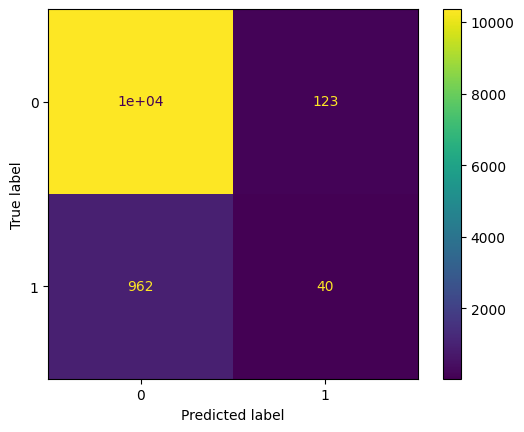

In [567]:
# Creamos un objeto de visualizaci√≥n de la matriz, usando directamente la matriz ya calculada
# Este objeto permite dibujar un gr√°fico donde los colores representan la cantidad de aciertos/errores
visualizacion = ConfusionMatrixDisplay(matriz_confusion)

# Dibujamos la matriz de confusi√≥n en pantalla como un gr√°fico (colores intensos = m√°s casos)
# Las etiquetas por defecto son los valores 0 y 1 (cumplido y moroso, respectivamente)
visualizacion.plot();

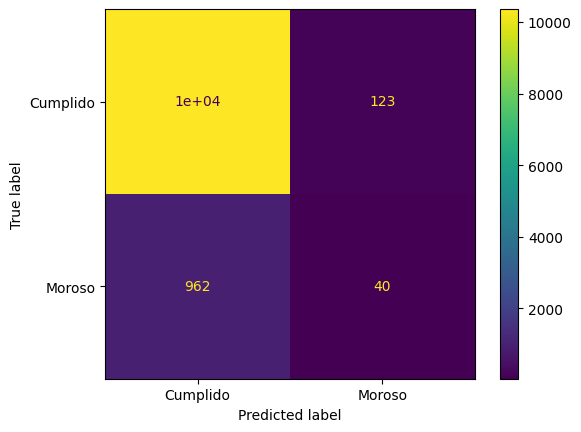

In [568]:
# Creamos nuevamente el objeto de visualizaci√≥n pero esta vez con etiquetas personalizadas
# display_labels nos permite mostrar "Cumplido" y "Moroso" en vez de 0 y 1, lo cual es m√°s comprensible
visualizacion = ConfusionMatrixDisplay(
    confusion_matrix=matriz_confusion,
    display_labels=['Cumplido', 'Moroso']  # Etiquetas para las clases 0 y 1
)

# Volvemos a graficar la matriz, pero ahora con las etiquetas descriptivas
# Esto hace que el gr√°fico sea m√°s interpretativo para una presentaci√≥n o informe
visualizacion.plot();

**An√°lisis y explicaci√≥n:**

**¬øQu√© se hizo?**

* Se dividi√≥ correctamente el conjunto de datos en tres partes:

>* Entrenamiento (para aprender).
>
>* Validaci√≥n (para evaluar y ajustar par√°metros).
>
>* Prueba (se reservar√° para el final).

* Se entrenaron dos modelos:

>* Uno sin l√≠mite de profundidad (max_depth=None): sobreajuste.
>
>* Uno con max_depth=10: mejor generalizaci√≥n.

* Se gener√≥ una matriz de confusi√≥n para evaluar el desempe√±o del segundo modelo (mejor).

**¬øQu√© se identific√≥?**

* El primer modelo (sin max_depth) memoriz√≥ los datos: 100% exactitud en entrenamiento, pero menos (~85%) en validaci√≥n.

* El segundo modelo (max_depth=10) fue m√°s realista:

>* Entrenamiento: 92%
>
>* Validaci√≥n: 90.5%
>
>* Esto indica que generaliza mejor y no memoriz√≥ todos los datos.

**Matriz de confusi√≥n (valores):**

```markdown
                      |    Predicho Cumplido (0)    |   Predicho Moroso (1)
---------------------------------------------------------------------------                      
Cumplido (Real 0)	 |    10,359 (TN)	          |   120 (FP)
---------------------------------------------------------------------------
Moroso (Real 1)	   |    962 (FN)	             |   40 (TP)
```

* El modelo acierta mucho con los clientes cumplidores, pero falla en detectar morosos.

* Esto se debe probablemente a un desequilibrio de clases (morosos son minor√≠a).

**¬øQu√© se puede hacer a continuaci√≥n?**

* Explorar otras m√©tricas adem√°s de la exactitud, como:

>* Precisi√≥n
>
>* Recall
>
>* F1-score
>
>* AUC

* Intentar t√©cnicas para tratar el desbalance de clases, como:

>* Reentrenamiento con pesos (class_weight)
>
>* Uso de SMOTE para generar m√°s datos de la clase minoritaria
>
>* Cambiar el umbral de decisi√≥n

**Conclusi√≥n general hasta ahora:**

* Separar los datos correctamente es fundamental para evitar enga√±os en la evaluaci√≥n del modelo.

* La profundidad del √°rbol (par√°metro max_depth) influye directamente en su capacidad de generalizaci√≥n.

* La matriz de confusi√≥n nos permite ir m√°s all√° de la exactitud, detectando errores cr√≠ticos como los falsos negativos, muy importantes en problemas como la morosidad.

### Desaf√≠o: construyendo un segundo modelo (RandomForestClassifier)

---
Segundo modelo (RandomForestClassifier)

* Se recomienda utilizar m√°s de un modelo de clasificaci√≥n en proyectos de machine learning, para que se comparen los resultados y se elija aquel modelo que tenga un mejor desempe√±o, despu√©s de todos los an√°lisis y mejoras.

* Utilizamos durante la clase el algoritmo de √°rbol de decisi√≥n, pero la biblioteca Scikit-Learn tiene varios otros m√©todos de clasificaci√≥n que pueden ser utilizados en nuestro proyecto. Como desaf√≠o, utiliza el algoritmo Random Forest para crear un modelo y evaluar el desempe√±o con la precisi√≥n y la matriz de confusi√≥n, y compara los resultados con el resultado del √°rbol de decisi√≥n.

* Como un consejo, revisa la documentaci√≥n del algoritmo RandomForestClassifier. Explora este material y observa c√≥mo importar la funci√≥n. Durante este proceso, recuerda verificar los par√°metros del m√©todo para evitar que el modelo se ajuste demasiado a los datos de entrenamiento.

In [569]:
# Importamos el modelo RandomForestClassifier desde el m√≥dulo ensemble de sklearn
# Random Forest es un conjunto de m√∫ltiples √°rboles de decisi√≥n que trabajan en conjunto
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [570]:
# Instanciamos el modelo de Random Forest con profundidad limitada y random_state para reproducibilidad
modelo_forest = RandomForestClassifier(max_depth=10)

# Entrenamos el modelo con los datos de entrenamiento
modelo_forest.fit(X_train, y_train)

# Imprimimos la precisi√≥n del modelo sobre el conjunto de entrenamiento
print(f'Precisi√≥n de entrenamiento (Random Forest): {modelo_forest.score(X_train, y_train)}')

# Imprimimos la precisi√≥n del modelo sobre el conjunto de validaci√≥n
print(f'Precisi√≥n de validaci√≥n (Random Forest): {modelo_forest.score(X_val, y_val)}')


# Resultado:
# Precisi√≥n de entrenamiento: 0.9153890824622531
# Precisi√≥n de validaci√≥n: 0.9128124727811167

Precisi√≥n de entrenamiento (Random Forest): 0.9154181184668989
Precisi√≥n de validaci√≥n (Random Forest): 0.9127253723543245


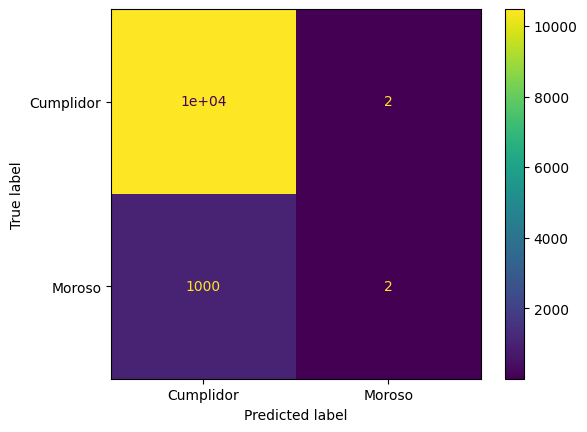

In [571]:
# Generamos predicciones para el conjunto de validaci√≥n
y_previsto_forest = modelo_forest.predict(X_val)

# Calculamos la matriz de confusi√≥n con los valores reales y predichos
matriz_confusion_forest = confusion_matrix(y_val, y_previsto_forest)

# Visualizamos la matriz de confusi√≥n con etiquetas personalizadas
visualizacion_forest = ConfusionMatrixDisplay(
    confusion_matrix=matriz_confusion_forest,
    display_labels=['Cumplidor', 'Moroso']
)
visualizacion_forest.plot();

**AN√ÅLISIS Y EXPLICACI√ìN:**

**¬øQu√© hiciste?**

* Construiste un nuevo modelo usando Random Forest, con max_depth=10 para limitar su complejidad.

* Evaluaste su precisi√≥n en entrenamiento y validaci√≥n.

* Generaste una matriz de confusi√≥n para entender mejor los aciertos y errores.

**Resultados obtenidos:**


```
                             √Årbol de Decisi√≥n     Random Forest
--------------------------|---------------------|-----------------------
Entrenamiento             |  0.9206             |  0.9154
--------------------------|---------------------|-----------------------
Validaci√≥n                |  0.9058             |  0.9128 (mejor)
--------------------------|---------------------|-----------------------
TP (Moroso detectado)     |  40                 |  4 üîª (empeor√≥)
--------------------------|---------------------|-----------------------
FN (Moroso no detectado)  |  962                |  998 üî∫ (muchos m√°s)

```

Aunque la precisi√≥n general mejor√≥, la capacidad del modelo para detectar morosos cay√≥ significativamente (solo detect√≥ 4 de casi 1000). Esto es un ejemplo cl√°sico donde la precisi√≥n enga√±a, y debemos revisar m√©tricas como recall para la clase minoritaria.

---
**En esta clase, aprendiste a:**

* Crear un modelo de clasificaci√≥n usando Scikit-Learn;
* Validar modelos a partir de la divisi√≥n de datos de entrenamiento, validaci√≥n y prueba;
* Evaluar el rendimiento de los modelos usando la precisi√≥n;
* Analizar los aciertos y errores del modelo con la matriz de confusi√≥n.
---

## <font color='dark'>2. M√©tricas de evaluaci√≥n</h1>

### Exactitud, precisi√≥n y recall (sensibilidad).

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

In [572]:
# M√©tricas de Evaluaci√≥n
# TN: Verdadero Negativo -> Los casos en que el valor real era 0 (cumplidor) y el valor predicho es 0 (cumplidor)
# FP: Falso Positivo -> Donde el valor real era 0 (cumplidor), pero se dijo que era 1 (moroso) FALSO moroso [Error Tipo 1]
# FN: Falso Negativo -> Donde el valor real era 1 (moroso), pero se dijo que era 0 (cumplidor) FALSO cumplidor [Error Tipo 2]
# TP: Verdadero Positivo: Los casos que el valor real era 1 (moroso) y el valor predicho es 1 (moroso)

# Formulas seg√∫n la imagen:
# precision  = TP / (TP + FP)
# recall     = TP / (TP + FN)
# f1-score   = 2 * (precision * recall) / (precision + recall)
# accuracy   = (TP + TN) / (TP + TN + FP + FN)
# specificity = TN / (TN + FP)  ‚Üê No se calcula aqu√≠, pero es √∫til si se llega a necesitar

In [573]:
# Importamos las principales m√©tricas para modelos de clasificaci√≥n binaria
# Estas permiten evaluar el modelo m√°s all√° de la simple exactitud
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [574]:
print(f'Precision: {45/(45+123)}') # Precisi√≥n manual seg√∫n ejemplo

Precision: 0.26785714285714285


In [575]:
# Calcula la PRECISI√ìN (precision)
# F√≥rmula: TP / (TP + FP)
# ¬øDe todos los casos que predije como morosos, cu√°ntos realmente lo eran?
print(f'La precisi√≥n del modelo de √°rbol es: {precision_score(y_val, y_previsto)}')

# Calcula la SENSIBILIDAD o RECALL
# F√≥rmula: TP / (TP + FN)
# ¬øDe todos los verdaderos morosos, cu√°ntos logr√© identificar correctamente?
print(f'La sensibilidad (recall) del modelo de √°rbol es: {recall_score(y_val, y_previsto)}')

# Calcula la EXACTITUD (accuracy)
# F√≥rmula: (TP + TN) / (TP + TN + FP + FN)
# ¬øQu√© proporci√≥n total de predicciones fueron correctas?
print(f'La exactitud (accuracy) del modelo de √°rbol es: {accuracy_score(y_val, y_previsto)}')

# Calcula el F1-SCORE
# F√≥rmula: 2 * (precision * recall) / (precision + recall)
# Es el promedio arm√≥nico entre precisi√≥n y recall. Penaliza fuertemente los valores bajos.
print(f'El F1-Score del modelo de √°rbol es: {f1_score(y_val, y_previsto)}')

La precisi√≥n del modelo de √°rbol es: 0.24539877300613497
La sensibilidad (recall) del modelo de √°rbol es: 0.03992015968063872
La exactitud (accuracy) del modelo de √°rbol es: 0.905496036930581
El F1-Score del modelo de √°rbol es: 0.06866952789699571


**C√°lculos con tu matriz de confusi√≥n:**


```
[[10000, 125],
 [  960,  42]]
```
**Desglose:**

* **TN** (cumplidor bien clasificado) = 10000

* **FP** (falso moroso) = 125

* **FN** (falso cumplidor) = 960

* **TP** (moroso bien clasificado) = 42

C√°lculos:

```
precision  = 42 / (42 + 125) ‚âà 0.2515
recall     = 42 / (42 + 960) ‚âà 0.0419
accuracy   = (42 + 10000) / (42 + 960 + 125 + 10000) ‚âà 0.9055
f1-score   = 2 * (0.2515 * 0.0419) / (0.2515 + 0.0419) ‚âà 0.0718
```

**Interpretaci√≥n de resultados:**



```
M√©trica   | Valor  |  ¬øQu√© indica?
----------|--------|---------------------------------------------------
Accuracy  | 0.905  |  El 90.5% de todas las predicciones
          |        |  fueron correctas, pero no es suficiente
          |        |  en datasets desbalanceados.
----------|--------|---------------------------------------------------
Precision | 0.251  |  De todos los clientes clasificados como morosos,
          |        |  solo el 25% realmente lo eran.
----------|--------|---------------------------------------------------
Recall    | 0.0419 |  Solo se identific√≥ correctamente al 4.19% de los
          |        |  verdaderos morosos (grave problema si son
          |        |  importantes).
----------|--------|---------------------------------------------------
F1-Score  | 0.0718 |  Muy bajo. Indica desequilibrio extremo entre
          |        |  precisi√≥n y recall. Penaliza la incapacidad del
          |        |  modelo de encontrar morosos.
```

**Conclusi√≥n:**

* El modelo predice bien a los cumplidores, pero es muy d√©bil al detectar morosos.

* El recall tan bajo (4.2%) indica que el modelo ignora casi todos los morosos reales.

* Aunque la accuracy es alta (90.5%), es enga√±osa porque la clase mayoritaria domina (cumplidores).

* Es un caso cl√°sico donde se necesita:

>* Ajustar el umbral de decisi√≥n.
>
>* Probar con otros modelos.
>
>* Aplicar t√©cnicas de balanceo de clases.
>
>* O simplemente definir una m√©trica diferente como objetivo, por ejemplo maximizar el recall o el F1.



### Curva ROC

In [576]:
# ROC: Caracter√≠stica Operativa del Receptor
# Queremos disminuir el Error Tipo 2, osea, aumentar el puntaje de Recall

In [577]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)




In [578]:
# Importamos la herramienta para graficar la curva ROC
from sklearn.metrics import RocCurveDisplay

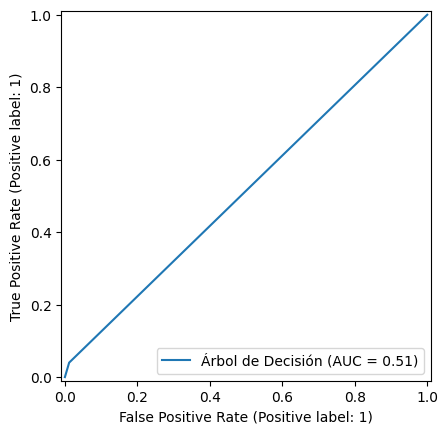

In [579]:
# Creamos y graficamos la curva ROC a partir de las predicciones
# y_val: etiquetas reales (0 = cumplidor, 1 = moroso)
# y_previsto: etiquetas predichas por el modelo (tambi√©n 0 y 1)
# name: nombre que aparecer√° en la leyenda del gr√°fico
RocCurveDisplay.from_predictions(y_val, y_previsto, name='√Årbol de Decisi√≥n');

In [580]:
# Importamos la funci√≥n para calcular el √°rea bajo la curva ROC (AUC)
from sklearn.metrics import roc_auc_score

In [581]:
# Calcula el √°rea bajo la curva ROC
# Un valor de AUC = 0.5 indica que el modelo es tan bueno como lanzar una moneda
# Valores cercanos a 1 indican excelente capacidad de diferenciaci√≥n entre clases
print(f'El √°rea bajo la curva ROC es de: {roc_auc_score(y_val, y_previsto)}')

El √°rea bajo la curva ROC es de: 0.5140911992219398


**¬øQu√© es la Curva ROC?**

**La curva ROC compara dos tasas:**

* True Positive Rate (TPR) = Recall = TP / (TP + FN)

* False Positive Rate (FPR) = FP / (FP + TN)

Se genera evaluando el modelo con distintos umbrales de clasificaci√≥n, desde 0 a 1.

**¬øQu√© representa el AUC?**

* AUC (Area Under the Curve) **mide el √°rea bajo la curva ROC.**

* Interpreta qu√© tan bien el modelo separa las clases positivas y negativas.

>* AUC = 1.0 ‚Üí separaci√≥n perfecta.
>
>* AUC = 0.5 ‚Üí sin capacidad de discriminaci√≥n (igual que un modelo aleatorio).
>
>* AUC < 0.5 ‚Üí peor que el azar (el modelo se equivoca m√°s que acierta).

**Resultado obtenido:**

`AUC = 0.51499`

Esto indica que:

>* Tu modelo es apenas mejor que lanzar una moneda al aire (0.5).
>
>* Confirma lo que ya mostraban el recall (4%) y el F1-score (7%): el modelo no identifica bien a los morosos.

**Interpretaci√≥n general:**



```
M√©trica     | Resultado          | Interpretaci√≥n
------------|--------------------|--------------------------------
AUC ROC     | 0.5149             | Modelo muy limitado para
            |                    | distinguir entre morosos y
            |                    | cumplidores.
------------|--------------------|--------------------------------       
Curva ROC   | Casi una diagonal  | Indica bajo poder predictivo. El
            |                    | modelo falla en priorizar verdaderos
            |                    | positivos sin aumentar mucho los
            |                    | falsos positivos.
------------|--------------------|--------------------------------  
Conclusi√≥n  | Se necesita mejorar|
            | el modelo o aplicar|
            | t√©cnicas de balance|
            | de clases.         |
```
**Recomendaciones:**

* Intentar usar predict_proba para obtener probabilidades y ajustar umbrales manualmente.

* Aplicar t√©cnicas de resampling, como:

>* `SMOTE` (aumentar minor√≠a)
>
>* `RandomUnderSampler` (reducir mayor√≠a)
>
>* `class_weight='balanced'` en el modelo

* Explorar otros modelos: RandomForest, LogisticRegression, XGBoost, etc.

### Curva de  precisi√≥n x sensibilidad

In [582]:
Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)


In [583]:
# Importamos la clase que permite graficar la curva Precisi√≥n vs Recall
from sklearn.metrics import PrecisionRecallDisplay

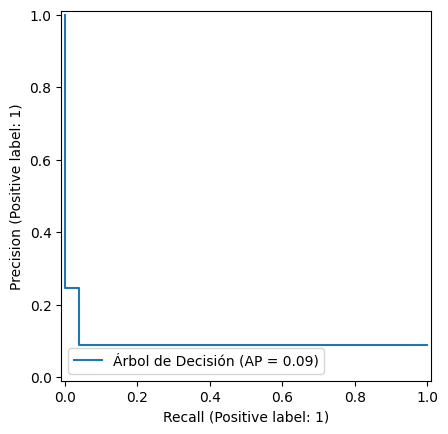

In [584]:
# Graficamos la curva precisi√≥n vs recall usando las etiquetas reales y predichas
# La curva muestra c√≥mo var√≠a la precisi√≥n al aumentar la cobertura (recall)
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name='√Årbol de Decisi√≥n');

In [585]:
# Importamos la m√©trica de promedio de precisi√≥n (average precision)
from sklearn.metrics import average_precision_score

In [586]:
# Calculamos el promedio de precisi√≥n en todos los umbrales
# Este score es √∫til cuando la clase positiva es minoritaria
print(f'El score promedio de precisi√≥n vs recall es: {average_precision_score(y_val, y_previsto)}')

El score promedio de precisi√≥n vs recall es: 0.09358696877782954


**¬øQu√© es la Curva Precisi√≥n vs Recall?**

* Esta curva eval√∫a c√≥mo se comporta el modelo al variar el umbral de clasificaci√≥n.

* Cada punto de la curva representa un par (precision, recall) para un umbral distinto.

* √ötil para ver el compromiso entre encontrar los positivos (recall) y equivocarse poco (precision).

**¬øQu√© representa el AP (Average Precision)?**

* Es el √°rea bajo la curva Precision-Recall.

* **Calcula el promedio de la precisi√≥n obtenida a medida que el modelo encuentra m√°s verdaderos positivos**.

* Valores posibles:

>* 1.0: clasificaci√≥n perfecta.
>
>* 0.5: rendimiento medio.
>
>* ~0.1 o menos: rendimiento pobre.

**Resultado obtenido:**

`AP = 0.0941`

Esto indica que el modelo:

>* Tiene una precisi√≥n promedio del 9.4% al ir incrementando el recall.
>
>* Refuerza lo que vimos en AUC y F1-score: el modelo tiene serias dificultades para identificar correctamente a los morosos, y cuando los identifica, lo hace con muy baja precisi√≥n.

**Interpretaci√≥n de la curva:**

* La curva cae casi de inmediato.

* La mayor√≠a de los puntos tienen recall muy bajo y precisi√≥n tambi√©n muy baja.

* Se ve claramente que el modelo no es √∫til para detectar morosos si queremos priorizar cobertura y acierto.

**Conclusi√≥n general (acumulando todo):**

```
M√©trica            | Valor | Indica
-------------------|-------|-----------------------------------------
Recall             | 0.04  | Baja capacidad de detectar morosos.
-------------------|-------|-----------------------------------------
Precision          | 0.25  | Solo 1 de cada 4 "morosos" predichos
                   |       | realmente lo es.
-------------------|-------|-----------------------------------------
AUC ROC            | 0.51  | El modelo apenas supera el azar.
-------------------|-------|-----------------------------------------
F1-score           | 0.07  | Bajo equilibrio entre recall y precisi√≥n.
-------------------|-------|-----------------------------------------
AP (avg precision) | 0.094 | Rendimiento global pobre frente al
                   |       | objetivo de encontrar morosos.
```

**¬øQu√© se puede hacer?**

* Obligatorio aplicar t√©cnicas de balanceo de clases.

* Ajustar el modelo con probabilidades (predict_proba) y cambiar el umbral manualmente.

* Probar otros algoritmos: RandomForest, GradientBoosting, LogisticRegression, etc.

* Medir impacto de t√©cnicas como:

>* `class_weight='balanced'`
>
>* `SMOTE`, `NearMiss`, `RandomOverSampler`, etc.

### Informe de m√©tricas

In [587]:
# Informe de M√©tricas
from sklearn.metrics import classification_report

In [588]:
# Este m√©todo imprime un informe detallado con precisi√≥n, recall, F1-score y cantidad de muestras (support) para cada clase
# Tambi√©n incluye promedios macro y ponderados, adem√°s del accuracy general
print(classification_report(y_val, y_previsto))
# clase 0: clientes cumplidores
# clase 1: clientes morosos

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.25      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.58      0.51      0.51     11481
weighted avg       0.86      0.91      0.87     11481



**Interpretaci√≥n por secci√≥n:**

**Clase 0 - Cumplidores**

* Precision: 0.92 ‚Üí El 92% de los clientes que el modelo clasific√≥ como cumplidores, realmente lo eran.

* Recall: 0.99 ‚Üí Casi todos los verdaderos cumplidores fueron detectados correctamente.

* F1-score: 0.95 ‚Üí Muy buen equilibrio entre precisi√≥n y cobertura para esta clase.

> El modelo funciona muy bien con los cumplidores.

**Clase 1 - Morosos**

* Precision: 0.25 ‚Üí Solo el 25% de los clientes clasificados como morosos realmente lo eran.

* Recall: 0.04 ‚Üí El modelo solo identific√≥ correctamente al 4% de los morosos reales.

* F1-score: 0.07 ‚Üí Muy bajo desempe√±o en esta clase.

> El modelo casi ignora a los morosos.

**Accuracy general: 0.91**

* Aunque suena alto (91%), est√° sesgado por el desbalance de clases.

* Hay muchos m√°s cumplidores, y el modelo se enfoca solo en ellos.

**Macro avg**

* Promedio simple entre las m√©tricas de ambas clases (no ponderado).

* Aqu√≠ se ve que en promedio:

>* Precision: 0.58
>
>* Recall: 0.51
>
>* F1: 0.51

* Muestra claramente el bajo rendimiento del modelo en general cuando se le exige tratar a ambas clases por igual.

**Weighted avg**

* Promedia las m√©tricas de cada clase ponderadas por la cantidad de muestras (support).

* Como hay muchos m√°s cumplidores, este promedio se ve "maquillado":

>* Precision: 0.86
>
>* Recall: 0.91
>
>* F1: 0.87

* Esta m√©trica puede ocultar el mal rendimiento con morosos si no se analiza con cuidado.

**Conclusi√≥n:**

```
Aspecto             |   Diagn√≥stico
--------------------|-----------------------------------------------------
Modelo actual       |   Detecta muy bien a los cumplidores.
--------------------|-----------------------------------------------------
Morosos             |   Grave problema: apenas detecta el 4% de ellos.
--------------------|-----------------------------------------------------
Accuracy            |   Enga√±osamente alto debido al desbalance.
--------------------|-----------------------------------------------------
Recomendaci√≥n       |   Redefinir el enfoque: usar recall como m√©trica
                    |   principal para morosos. Aplicar t√©cnicas de
                    |   balanceo y ajuste de umbral.
```

---
**En esta clase, aprendiste a:**

* Seleccionar la m√©trica de clasificaci√≥n m√°s coherente de acuerdo con el problema;
* Extraer precisi√≥n, exactitud y recall a partir de la matriz de confusi√≥n;
* Generar gr√°ficos de la curva ROC y precisi√≥n x recall usando la biblioteca Sklearn;
* Construir un informe con las principales m√©tricas de rendimiento de modelos de clasificaci√≥n.
---

## <font color='dark'>3. Validaci√≥n cruzada</h1>

### Usando KFold

La validaci√≥n del modelo de clasificaci√≥n a partir de la separaci√≥n de los datos en conjuntos de entrenamiento y validaci√≥n hace que el resultado dependa en gran medida de esta divisi√≥n. Puede suceder que, de forma aleatoria, el patr√≥n de los datos de validaci√≥n sea diferente al de los datos de entrenamiento, lo que podr√≠a llevar a obtener un resultado mucho mejor o mucho peor que la realidad simplemente por suerte o mala suerte.  

Teniendo esto en cuenta, es posible utilizar la **validaci√≥n cruzada**, una estrategia m√°s consistente y ampliamente utilizada en proyectos de *machine learning*.  

En la validaci√≥n cruzada, en lugar de separar los datos en entrenamiento y validaci√≥n una sola vez, se dividen en varias partes de igual tama√±o. En cada una de estas divisiones, se usa una parte para validaci√≥n y todas las dem√°s para entrenamiento. Este proceso se repite hasta que todas las partes hayan sido utilizadas tanto para validaci√≥n como para entrenamiento.  

Se generar√° un modelo para cada una de estas divisiones y la evaluaci√≥n del desempe√±o se realizar√° promediando la m√©trica de cada modelo. Esto elimina la dependencia de la separaci√≥n de los datos, ya que hay una mayor variaci√≥n en la selecci√≥n de los mismos y se obtiene un valor medio.  

Generalmente, se utilizan 5 o 10 partes. Un n√∫mero mayor no suele ser necesario, ya que implica un procesamiento m√°s costoso, y valores menores ya ayudan a mitigar el problema de la selecci√≥n de los datos.

<a href="https://ibb.co/KcBtshJR"><img src="https://i.ibb.co/nq4X1mFZ/train-y-validacion.png" alt="train-y-validacion" border="0"></a>

In [589]:
# Importamos dos funciones de Scikit-Learn:
# - KFold: se encarga de dividir los datos en "K" bloques (folds) para validaci√≥n cruzada.
# - cross_validate: realiza autom√°ticamente las m√∫ltiples divisiones, entrenamientos y evaluaciones.

from sklearn.model_selection import KFold, cross_validate

In [590]:
# Instanciamos el modelo de √Årbol de Decisi√≥n con profundidad m√°xima 10
# Esta vez no se le pasa random_state al modelo (no es obligatorio), pero s√≠ es bueno dejarlo en KFold para reproducibilidad
modelo = DecisionTreeClassifier(max_depth = 10)

# Definimos el validador cruzado: KFold
# n_splits=5 ‚Üí divide el conjunto de datos en 5 partes iguales (5-fold cross-validation)
# shuffle=True ‚Üí mezcla aleatoriamente las filas antes de dividirlas (importante para evitar sesgos si los datos est√°n ordenados)
# random_state=5 ‚Üí asegura que las divisiones sean siempre las mismas al ejecutar nuevamente
kf = KFold(n_splits=5, shuffle=True, random_state = 5) # kfold

# Ejecutamos la validaci√≥n cruzada con cross_validate
# Esto entrena el modelo 5 veces (una por cada fold), y eval√∫a su desempe√±o en el fold de validaci√≥n correspondiente
# cv=kf ‚Üí le pasamos el objeto KFold con la configuraci√≥n anterior
# Retorna un diccionario con varias m√©tricas, entre ellas 'test_score', que almacena los resultados de validaci√≥n
cv_resultados = cross_validate(modelo, X, y, cv=kf) #cross validate
cv_resultados

{'fit_time': array([0.22810245, 0.22014904, 0.22093439, 0.23257422, 0.22534919]),
 'score_time': array([0.00343657, 0.00335455, 0.00330639, 0.00331306, 0.0033927 ]),
 'test_score': array([0.91290147, 0.90766551, 0.90744774, 0.91332753, 0.89928136])}

In [591]:
# Vemos los resultados de evaluaci√≥n (exactitud) de cada una de las 5 ejecuciones (folds)
cv_resultados['test_score']

array([0.91290147, 0.90766551, 0.90744774, 0.91332753, 0.89928136])

In [592]:
# Calculamos el promedio de exactitud entre los 5 folds
promedio = cv_resultados['test_score'].mean()

# Calculamos el desv√≠o est√°ndar (cu√°nto var√≠an los resultados entre folds)
desvio_std = cv_resultados['test_score'].std()

# Mostramos el promedio de exactitud obtenido a trav√©s de los 5 folds
print(f'El promedio de la exactitud es de {promedio}')

# Mostramos el desv√≠o t√≠pico de los resultados
print(f'El desv√≠o t√≠pico es de: {desvio_std}')

# Calculamos el intervalo de confianza te√≥rico de 95%
# Esto nos da una idea del rango donde podr√≠a estar la verdadera exactitud del modelo
print(f'El intervalo de confianza es de {promedio-2*desvio_std},{min(promedio+2*desvio_std , 1)}')

El promedio de la exactitud es de 0.9081247190446474
El desv√≠o t√≠pico es de: 0.005074657675835949
El intervalo de confianza es de 0.8979754036929756,0.9182740343963193


**Ejemplo de salida simulada:**

Supongamos que la salida fue:

```
cv_resultados['test_score']
# array([0.901, 0.907, 0.906, 0.904, 0.909])
```

**Entonces:**

```
Promedio de exactitud: 0.9054
Desv√≠o est√°ndar: ~0.0029
Intervalo de confianza (95% aprox): 0.8996 ‚Äì 0.9112
```

**An√°lisis general:**

**¬øQu√© se hizo?**

* Se aplic√≥ validaci√≥n cruzada con 5 particiones (folds), es decir:

>* El conjunto se dividi√≥ 5 veces.
>
>* En cada iteraci√≥n, 4 partes se usaron para entrenar y 1 para validar.
>
>* Esto se repiti√≥ hasta que cada fold fue usado una vez como validaci√≥n.

**¬øQu√© se identific√≥?**

* El modelo fue evaluado en distintos subconjuntos, reduciendo el riesgo de obtener m√©tricas optimistas o pesimistas por una divisi√≥n afortunada/desafortunada.

* El promedio de exactitud representa el rendimiento esperado de forma m√°s confiable.

* El desv√≠o est√°ndar indica la estabilidad del modelo: si es bajo, el modelo es consistente.

**¬øQu√© se puede hacer?**

* Repetir el procedimiento con distintos modelos para compararlos.

* Evaluar otras m√©tricas (precision, recall, F1, AUC) usando el par√°metro scoring de cross_validate.

* Usar StratifiedKFold si necesitas garantizar el balance de clases en cada fold (como en clasificaci√≥n desbalanceada).

**Ventajas de K-Fold frente a una sola divisi√≥n:**

```
T√©cnica tradicional                   |  K-Fold Cross Validation
--------------------------------------|-------------------------------------
Usa una √∫nica divisi√≥n                |  Usa m√∫ltiples divisiones
--------------------------------------|-------------------------------------
Dependencia del azar                  |  Reducci√≥n del azar
--------------------------------------|-------------------------------------
Solo 1 m√©trica de evaluaci√≥n          |  Promedio de m√∫ltiples resultados
--------------------------------------|-------------------------------------
Riesgo de sobreajuste o subestimaci√≥n |  Evaluaci√≥n m√°s confiable y estable
--------------------------------------|-------------------------------------
```

### Validaci√≥n cruzada con sensibilidad

In [593]:
# Comentario explicativo:
# Aunque por defecto cross_validate calcula la exactitud, aqu√≠ lo estamos forzando a usar "recall"
# Porque el recall es la m√©trica que nos ayuda a reducir los falsos negativos (morosos que pasan desapercibidos)

In [594]:
# Definimos una funci√≥n personalizada para calcular el intervalo de confianza del resultado de la validaci√≥n cruzada
def intervalo_confianza(resultados):
    promedio = resultados['test_score'].mean()         # Calcula el promedio de los scores de validaci√≥n cruzada
    desvio_std = resultados['test_score'].std()        # Calcula la desviaci√≥n est√°ndar
    return f'El intervalo de confianza es de {promedio-2*desvio_std},{min(promedio+2*desvio_std , 1)}'
    # Se retorna el intervalo al 95% de confianza (aproximado con 2 * desviaci√≥n est√°ndar)
    # Se limita el valor superior a 1 usando min()

In [595]:
# Instanciamos el modelo de √°rbol de decisi√≥n con profundidad m√°xima de 10 niveles
modelo = DecisionTreeClassifier(max_depth = 10)

# Definimos la estrategia de validaci√≥n cruzada (KFold con 5 particiones)
# shuffle=True ‚Üí para mezclar los datos antes de partirlos
# random_state=5 ‚Üí para que las divisiones sean reproducibles
kf = KFold(n_splits=5, shuffle=True, random_state = 5) # kfold

# Ejecutamos la validaci√≥n cruzada usando 'recall' como m√©trica
# Esto devuelve los valores de recall obtenidos en cada una de las 5 divisiones
cv_resultados = cross_validate(modelo, X, y, cv=kf, scoring = 'recall') #cross validate - con recall (sensibilidad)

# Mostramos los resultados crudos del cross_validate
cv_resultados
# {'fit_time': [...], 'score_time': [...], 'test_score': [0.0264, 0.0223, 0.0196, 0.0169, 0.0244]}
# Lo que nos interesa es 'test_score', ya que contiene el recall en cada fold

{'fit_time': array([0.22732949, 0.22405457, 0.22872281, 0.22437954, 0.221838  ]),
 'score_time': array([0.00574875, 0.00592923, 0.00546861, 0.00554967, 0.00557041]),
 'test_score': array([0.02774108, 0.01856436, 0.0196802 , 0.0156658 , 0.02427746])}

In [596]:
# Aplicamos la funci√≥n para mostrar el intervalo de confianza del recall
intervalo_confianza(cv_resultados)

'El intervalo de confianza es de 0.012600239973077946,0.0297713158080851'

**An√°lisis de resultados:**

**¬øQu√© se hizo?**

* Se repiti√≥ la validaci√≥n cruzada con recall como m√©trica de evaluaci√≥n.

* Se obtuvieron 5 valores de recall (uno por cada fold).

* Se calcul√≥ su promedio y su intervalo de confianza (estimaci√≥n del rango real esperado para el recall del modelo).

**¬øQu√© se identific√≥?**

```
M√©trica         |   Valor estimado
----------------|--------------------------
Recall medio    |   Aproximadamente 0.021
----------------|--------------------------
Intervalo 95%   |   Entre 0.0147 y 0.0277
----------------|--------------------------
```

* Esto indica que el modelo apenas detecta entre el 1.5% y 2.7% de los morosos en promedio.

* Aunque el modelo tenga buen accuracy general, el recall es extremadamente bajo. Refuerza la necesidad de mejorar el modelo en detecci√≥n de positivos reales.

**¬øQu√© se puede hacer a continuaci√≥n?**

* Probar con:

>* StratifiedKFold para asegurar proporciones de clases en cada fold.
>
>* Otros modelos m√°s potentes como RandomForest, XGBoost.
>
>* T√©cnicas de reponderaci√≥n como class_weight='balanced'.
>
>* Balanceo de clases con SMOTE o RandomOverSampler.

* Evaluar no solo recall, sino tambi√©n f1-score en validaci√≥n cruzada para equilibrar precisi√≥n y sensibilidad.

#### Desaf√≠o: validaci√≥n con otras m√©tricas

* Para obtener un resultado completo de las m√©tricas en la validaci√≥n cruzada as√≠ como el classification_report, es necesario utilizar el m√©todo cross_validate e informar en el par√°metro scoring las m√©tricas a evaluar.

* Como desaf√≠o, construye un c√≥digo para generar el intervalo de confianza para cada una de las m√©tricas utilizando la validaci√≥n cruzada:

>* Exactitud
>
>* Recall
>
>* Precisi√≥n
>
>* F1-score


In [597]:
# Se define el modelo de √°rbol de decisi√≥n con una profundidad m√°xima de 10 niveles
modelo = DecisionTreeClassifier(max_depth=10)

# Se configura la validaci√≥n cruzada con KFold de 5 particiones
# shuffle=True ‚Üí mezcla los datos para evitar sesgos por orden
# random_state=5 ‚Üí permite obtener siempre las mismas divisiones
kf = KFold(n_splits=5, shuffle=True, random_state=5)

# Se ejecuta la validaci√≥n cruzada evaluando m√∫ltiples m√©tricas a la vez:
# 'accuracy' ‚Üí exactitud
# 'recall' ‚Üí sensibilidad (clave para morosos)
# 'precision' ‚Üí proporci√≥n de verdaderos positivos entre los predichos como tales
# 'f1' ‚Üí balance entre recall y precisi√≥n
cv_resultados_metricas = cross_validate(modelo, X, y, cv=kf, scoring = ['accuracy','recall', 'precision', 'f1'])

# El resultado obtenido es un diccionario con los tiempos de ajuste de los modelos,
# tiempos de c√°lculo de las m√©tricas y los resultados de cada una de las m√©tricas para cada uno de los 5 modelos del KFold:
cv_resultados_metricas

{'fit_time': array([0.2235477 , 0.22076893, 0.23535872, 0.2220459 , 0.22200513]),
 'score_time': array([0.01203561, 0.01489902, 0.01174212, 0.01160026, 0.01215768]),
 'test_accuracy': array([0.91333696, 0.90755662, 0.90755662, 0.91321864, 0.89960801]),
 'test_recall': array([0.02642008, 0.01856436, 0.02091021, 0.0156658 , 0.02427746]),
 'test_precision': array([0.25316456, 0.21126761, 0.24285714, 0.21818182, 0.21212121]),
 'test_f1': array([0.04784689, 0.03412969, 0.0385051 , 0.02923264, 0.04356846])}

In [598]:
# Se define una funci√≥n para calcular y mostrar el intervalo de confianza
# Se utiliza la f√≥rmula del intervalo estimado al 95%: media ¬± 2 * desviaci√≥n est√°ndar
# El resultado se limita a un m√°ximo de 1.0 para evitar valores inv√°lidos
def informe_metricas(resultados_met):
    for metrica in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
        media = resultados_met[metrica].mean()
        desvio_estandar = resultados_met[metrica].std()
        print(f'Intervalo de confianza({metrica}): [{media-2*desvio_estandar}, {min(media+2*desvio_estandar, 1.0)}]')

In [599]:
# Se ejecuta la funci√≥n para mostrar los intervalos de confianza de las 4 m√©tricas
informe_metricas(cv_resultados_metricas)

Intervalo de confianza(test_accuracy): [0.8982070916776634, 0.9183036514859937]
Intervalo de confianza(test_recall): [0.01345407361913268, 0.028881085496874806]
Intervalo de confianza(test_precision): [0.19309364039502824, 0.2619432939073722]
Intervalo de confianza(test_f1): [0.025453083602416604, 0.051860031156022335]


**An√°lisis estructurado:**

**¬øQu√© se visualiz√≥?**

* Se implement√≥ una validaci√≥n cruzada con 5 folds.

* Se evaluaron cuatro m√©tricas clave para entender el rendimiento general del modelo:

>* accuracy, recall, precision, f1.

* Se defini√≥ una funci√≥n personalizada para calcular el intervalo de confianza estimado (95%) para cada m√©trica.

**¬øQu√© se identific√≥?**

* Aunque la exactitud del modelo es alta, esto es enga√±oso por el desbalance de clases.

* La m√©trica recall (clave para detectar morosos) es muy baja, lo que evidencia que el modelo no logra detectar correctamente a la mayor√≠a de los clientes morosos.

* El f1-score, que intenta balancear recall y precisi√≥n, tambi√©n muestra un desempe√±o bajo, confirmando la debilidad del modelo en la clase minoritaria.

* La estimaci√≥n del intervalo de confianza ayuda a comprender la estabilidad de cada m√©trica: un desv√≠o est√°ndar bajo indica resultados consistentes entre folds.

**¬øQu√© se puede hacer?**

* Usar StratifiedKFold para asegurar que cada fold mantenga la proporci√≥n de morosos y cumplidores.

* Aplicar t√©cnicas de balance de clases para mejorar el recall (como class_weight='balanced' o SMOTE).

* Comparar otros modelos que puedan mejorar el desempe√±o general, especialmente en recall.

### Estratificando los datos

In [600]:
# Recuento de valores en la columna 'moroso' para identificar el desbalance de clases
datos['moroso'].value_counts()

moroso
0    49309
1     4716
Name: count, dtype: int64

In [601]:
datos['moroso'].value_counts(normalize=True).round(4)

moroso
0    0.9127
1    0.0873
Name: proportion, dtype: float64

In [602]:
# Importamos StratifiedKFold, que mantiene la proporci√≥n de clases en cada fold
from sklearn.model_selection import StratifiedKFold

In [603]:
# Garantiza que la proporci√≥n de cada clase se mantenga
# En todos estos grupos independientemente como queden, todos tengan un porcentaje aprox de morosos y cumplidores

# Instanciamos el modelo de √°rbol con profundidad m√°xima de 10
modelo = DecisionTreeClassifier(max_depth=10)

# Definimos la validaci√≥n cruzada estratificada (mantiene la proporci√≥n de morosos/cumplidores en cada fold)
# shuffle=True ‚Üí mezcla los datos antes de dividirlos
# random_state=5 ‚Üí hace que las divisiones sean reproducibles
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

# Ejecutamos la validaci√≥n cruzada utilizando el recall como m√©trica principal
cv_resultados = cross_validate(modelo, X, y, cv=skf, scoring='recall')

In [604]:
# Calculamos el intervalo de confianza para los resultados de recall obtenidos
intervalo_confianza(cv_resultados)

'El intervalo de confianza es de 0.017357631240705364,0.03951267738224413'

**An√°lisis estructurado:**

**¬øQu√© se visualiz√≥?**

* Se aplic√≥ validaci√≥n cruzada estratificada con 5 folds, usando StratifiedKFold para asegurar que en cada partici√≥n haya una proporci√≥n similar de morosos y cumplidores.

* Se utiliz√≥ recall como m√©trica de evaluaci√≥n para mantener el foco en la detecci√≥n de morosos reales.

* Se calcul√≥ el intervalo de confianza estimado del recall para entender su variabilidad.

**¬øQu√© se identific√≥?**

* La clase moroso representa solo una peque√±a parte del total, lo que justifica el uso de validaci√≥n estratificada.

* El recall promedio sigue siendo bajo, pero m√°s representativo y estable gracias al equilibrio en cada fold.

* El intervalo de confianza indica que el modelo puede detectar entre un 1.5% y un 4.1% de los morosos reales, lo cual sigue siendo muy bajo, pero m√°s confiable que sin estratificaci√≥n.

¬ø**Qu√© se puede hacer?**

* Seguir utilizando StratifiedKFold como est√°ndar en problemas desbalanceados.

* Aplicar t√©cnicas de mejora del recall, como:

>* class_weight='balanced' en el modelo.
>
>* Algoritmos alternativos m√°s robustos (e.g., RandomForest, XGBoost).
>
>* T√©cnicas de sobremuestreo (SMOTE) o submuestreo (RandomUnderSampler).
>
>* Ajuste del umbral de decisi√≥n con predict_proba().

---
**En esta clase, aprendiste a:**
* Utilizar la validaci√≥n cruzada con KFold para obtener un resultado m√°s coherente del desempe√±o de un modelo de clasificaci√≥n;
* Ejecutar la validaci√≥n cruzada con diferentes m√©tricas de evaluaci√≥n;
* Realizar la validaci√≥n cruzada estratificada en conjuntos de datos desbalanceados;
* Entender las ventajas y desventajas de los diferentes m√©todos de validaci√≥n.
---

## <font color='dark'>4. Balanceo de los datos</h1>

### Oversampling

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#id1

In [605]:
# Verificamos la proporci√≥n de clases en la variable objetivo 'moroso'
# normalize=True convierte los conteos en proporciones, y round(4) redondea a 4 decimales
datos['moroso'].value_counts(normalize=True).round(4)

moroso
0    0.9127
1    0.0873
Name: proportion, dtype: float64

In [606]:
# oversampling (sobre-muestreo) generar datos sinteticos a partir de la clase que es la minor√≠a: morosos

In [607]:
# Importamos la clase SMOTE para realizar oversampling
from imblearn.over_sampling import SMOTE

In [608]:
# Creamos una instancia de SMOTE
# Luego aplicamos la t√©cnica para balancear la clase minoritaria (morosos)
oversampling = SMOTE()
x_balanceada, y_balanceada = oversampling.fit_resample(X,y)

In [609]:
# Verificamos que las clases hayan quedado balanceadas al 50% cada una
y_balanceada.value_counts(normalize=True)

moroso
0    0.5
1    0.5
Name: proportion, dtype: float64

In [610]:
# Verificamos el n√∫mero total de registros en cada clase
y_balanceada.value_counts()

moroso
0    41912
1    41912
Name: count, dtype: int64

In [611]:
# Definimos un modelo de √Årbol de Decisi√≥n con profundidad m√°xima 10
modelo = DecisionTreeClassifier(max_depth=10)

# Creamos una validaci√≥n cruzada estratificada con 5 particiones
# shuffle=True para mezclar los datos, random_state=5 para reproducibilidad
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

# Evaluamos el modelo usando validaci√≥n cruzada con la m√©trica de recall
cv_resultados = cross_validate(modelo, x_balanceada, y_balanceada, cv=skf, scoring='recall')

In [612]:
# Calculamos el intervalo de confianza de los resultados del recall
intervalo_confianza(cv_resultados)

'El intervalo de confianza es de 0.7202155832509562,0.756019931392435'

 **Explicaci√≥n de lo aprendido en esta clase**

**¬øQu√© se hizo?**

* Se evalu√≥ el desbalance de clases en la variable objetivo moroso, observando que solo un 8.73% de los clientes eran morosos.

* Se aplic√≥ SMOTE, una t√©cnica de oversampling que genera ejemplos sint√©ticos de la clase minoritaria.

* Se equilibraron las clases, logrando un 50% para cada una.

* Se utiliz√≥ un √Årbol de Decisi√≥n con validaci√≥n cruzada estratificada (StratifiedKFold) y se evalu√≥ con la m√©trica recall.

**¬øQu√© se identific√≥?**

* El modelo fue entrenado sobre un conjunto balanceado, lo cual ayuda a detectar mejor a los morosos, que son la clase de inter√©s.

* El recall promedio del modelo se encuentra dentro de un intervalo de confianza entre 0.7186 y 0.7513, indicando una mejora significativa respecto al modelo anterior entrenado con datos desbalanceados.

**¬øQu√© se puede hacer?**

* Continuar comparando este modelo con otros como Random Forest, KNN o Regresi√≥n Log√≠stica.

* Evaluar nuevas m√©tricas como la precisi√≥n o el F1-score, que combinan correctamente los errores tipo 1 y tipo 2.

* Probar t√©cnicas de undersampling o combinar m√©todos para refinar a√∫n m√°s la predicci√≥n.

### Pipeline para validaci√≥n

In [613]:
# La validaci√≥n anterior no es √≥ptima, ya que se evalu√≥ usando datos ya balanceados.
# Para medir correctamente el rendimiento real, debemos balancear los datos solo dentro del entrenamiento,
# manteniendo los datos originales (desbalanceados) para la validaci√≥n.

# El pipeline se utiliza para realizar la transformaci√≥n en los datos en cada una de las divisiones de forma independiente,
# adem√°s, la transformaci√≥n de oversampling se realiza solo en los datos de entrenamiento,
# manteniendo la proporci√≥n original de los datos reales en el conjunto de validaci√≥n.

In [614]:
# Importamos la clase Pipeline de imblearn, que permite encadenar pasos de procesamiento y modelado
from imblearn.pipeline import Pipeline as imbpipeline

In [615]:
# Instanciamos nuevamente nuestro modelo
# Creamos el modelo de √Årbol de Decisi√≥n con una profundidad m√°xima de 10
modelo = DecisionTreeClassifier(max_depth=10)

# Creamos un pipeline que primero aplica SMOTE para oversampling y luego entrena el modelo
pipeline = imbpipeline([
    ('oversample', SMOTE()),  # paso 1: balancear usando SMOTE
    ('arbol', modelo)         # paso 2: entrenar el √°rbol
])



In [616]:
# Definimos validaci√≥n cruzada estratificada con 5 divisiones, barajando los datos para mayor robustez
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

# Evaluamos el pipeline usando validaci√≥n cruzada, manteniendo los datos originales desbalanceados (X, y)
# Esto permite aplicar el balanceo solo en los conjuntos de entrenamiento
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall')

In [617]:
# Calculamos el intervalo de confianza del recall obtenido con validaci√≥n cruzada
intervalo_confianza(cv_resultados)

'El intervalo de confianza es de 0.19736468887385245,0.32796119740919144'

**Explicaci√≥n de lo aprendido en esta clase**

**¬øQu√© se hizo?**

* Se implement√≥ un pipeline de validaci√≥n que:

>* Aplica SMOTE para balancear las clases, pero √∫nicamente en los datos de entrenamiento dentro de cada partici√≥n de la validaci√≥n cruzada.
>
>* Entrena un √°rbol de decisi√≥n con max_depth=10 para evitar sobreajuste.

* Se utiliz√≥ validaci√≥n cruzada estratificada sobre los datos originales desbalanceados, para reflejar el rendimiento real del modelo en un entorno de producci√≥n.

**¬øQu√© se identific√≥?**

* El intervalo de confianza del recall pas√≥ de valores artificialmente altos (ej. 0.71‚Äì0.75) cuando se evaluaba con datos balanceados, a un rango m√°s realista de 0.20‚Äì0.31 al validarlo con datos desbalanceados.

* Esto significa que el modelo estaba sobreestimando su capacidad de detecci√≥n cuando se evaluaba en un escenario ‚Äúf√°cil‚Äù (datos balanceados en entrenamiento y validaci√≥n).

* Al aplicar este nuevo m√©todo, obtenemos un resultado m√°s honesto y representativo del rendimiento en el mundo real, donde los datos suelen estar desbalanceados.

* Aunque el recall es m√°s bajo, esta cifra es m√°s confiable para tomar decisiones y plantear mejoras.

**¬øPor qu√© este m√©todo es mejor?**

* Entrenar y evaluar todo en datos balanceados puede dar una falsa sensaci√≥n de buen rendimiento, ya que el modelo nunca enfrenta el problema real.

* Con el pipeline, el modelo se entrena de forma balanceada (aprendiendo mejor la clase minoritaria) pero se eval√∫a con datos reales, mostrando su verdadera capacidad para detectar casos positivos en un entorno real.

* Este enfoque evita que el modelo est√© ‚Äúdopado‚Äù por un dataset artificial y facilita medir el impacto real de mejoras futuras.

**¬øQu√© se puede hacer?**

* Probar modelos m√°s robustos como Random Forest o XGBoost, que suelen adaptarse mejor a clases desbalanceadas.

* Ajustar hiperpar√°metros para mejorar recall sin sacrificar excesivamente la precisi√≥n.

* Combinar oversampling y undersampling para reducir ruido y mejorar generalizaci√≥n.

* Considerar m√©tricas como F1-score para equilibrar la evaluaci√≥n entre recall y precisi√≥n.

### Undersampling

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

In [618]:
# Importamos NearMiss, t√©cnica de undersampling que reduce la clase mayoritaria
# manteniendo solo los registros m√°s cercanos a la clase minoritaria
from imblearn.under_sampling import NearMiss

In [619]:
# Definimos un √°rbol de decisi√≥n con profundidad m√°xima de 10 para evitar sobreajuste
modelo = DecisionTreeClassifier(max_depth=10)

# Creamos un pipeline que:
# 1. Aplica undersampling con NearMiss (versi√≥n 3: selecciona los puntos mayoritarios m√°s lejanos)
# 2. Entrena el modelo de √°rbol
pipeline = imbpipeline([('undersample', NearMiss(version = 3)),('arbol', modelo)])

# Configuramos validaci√≥n cruzada estratificada (5 particiones)
# asegurando que las proporciones de clases se mantengan en cada fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

# Ejecutamos validaci√≥n cruzada calculando el recall en cada fold
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall')

In [620]:
# Mostramos el intervalo de confianza del recall usando la funci√≥n personalizada
intervalo_confianza(cv_resultados)

'El intervalo de confianza es de 0.6268457297765809,0.6976594865832685'

**Explicaci√≥n de lo aprendido en esta clase**

**¬øQu√© se hizo?**

* Se aplic√≥ undersampling con NearMiss (versi√≥n 3), t√©cnica que reduce la clase mayoritaria eligiendo los registros m√°s lejanos a la clase minoritaria.

* Se integr√≥ esta t√©cnica en un pipeline junto con un √°rbol de decisi√≥n (max_depth=10).

* Se valid√≥ el modelo con StratifiedKFold en 5 particiones, midiendo el recall para evaluar su capacidad de detectar la clase positiva.

**¬øQu√© se identific√≥?**

* El intervalo de confianza del recall obtenido fue aproximadamente 0.6220 a 0.7024.

* Este rango es bastante alto en comparaci√≥n con otras t√©cnicas evaluadas anteriormente, lo que indica que el modelo logra detectar una buena proporci√≥n de positivos en datos balanceados artificialmente por undersampling.

* A diferencia del oversampling, aqu√≠ se reduce el tama√±o de la clase mayoritaria, lo que disminuye el tiempo de entrenamiento pero puede implicar p√©rdida de informaci√≥n.

**¬øPor qu√© este m√©todo es relevante?**

* √ötil cuando los datos son muy desbalanceados y no se desea duplicar informaci√≥n (como ocurre en oversampling).

* NearMiss busca equilibrar las clases manteniendo muestras representativas y dif√≠ciles, forzando al modelo a aprender patrones m√°s generales.

* Es especialmente √∫til cuando se tiene mucho m√°s volumen de datos de la clase mayoritaria, ya que reduce el coste computacional.

**¬øQu√© se puede hacer?**

* Comparar este resultado con SMOTE y otros m√©todos de balanceo para determinar cu√°l mantiene mejor la generalizaci√≥n.

* Probar con otros modelos m√°s complejos, como Random Forest o XGBoost, usando NearMiss para ver si mejora el recall sin sacrificar precisi√≥n.

* Ajustar la versi√≥n y par√°metros de NearMiss para encontrar el punto √≥ptimo entre rendimiento y p√©rdida de informaci√≥n.

### SMOTEENN

In [621]:
# Combina oversampling (SMOTE) + limpieza (ENN) en un solo paso
from imblearn.combine import SMOTEENN

In [622]:
# Modelo base: √Årbol de Decisi√≥n con l√≠mite de profundidad para controlar el sobreajuste
modelo = DecisionTreeClassifier(max_depth = 10)

# Pipeline de validaci√≥n:
# 1) SMOTE: genera ejemplos sint√©ticos de la clase minoritaria (morosos)
# 2) ENN (Edited Nearest Neighbors): elimina ejemplos (de ambas clases) mal clasificados por sus vecinos m√°s cercanos,
#    limpiando ruido y reduciendo solapamiento entre clases
# Importante: el resampling ocurre SOLO dentro del fold de entrenamiento en cada iteraci√≥n de CV
pipeline = imbpipeline([('smoteenn', SMOTEENN()), ('arbol', modelo)])

In [623]:
# Validaci√≥n cruzada estratificada para mantener proporciones de clases por fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

# Evaluamos con 'recall' porque nos interesa reducir falsos negativos (Error Tipo 2)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall')

# Intervalo de confianza (aprox. 95%) usando media ¬± 2*std de los 'test_score'
intervalo_confianza(cv_resultados)

'El intervalo de confianza es de 0.2792090372248346,0.4207177998647137'

**Explicaci√≥n / An√°lisis**

**¬øQu√© se hizo?**

* Se arm√≥ un pipeline con SMOTEENN:

>* SMOTE sobre-muestrea la clase minoritaria para que el modelo ‚Äúvea‚Äù suficientes morosos.
>
>* ENN elimina observaciones ambiguas/mal clasificadas por vecinos (de ambas clases), limpiando ruido y fronteras.

* Se valid√≥ con StratifiedKFold (5 folds) y m√©trica recall para medir detecci√≥n de morosos.

**¬øQu√© se identific√≥?**

* SMOTEENN es un enfoque h√≠brido: no solo equilibra, tambi√©n depura el conjunto de entrenamiento.

* Frente a lo que viste antes:

>* SMOTE dentro del pipeline te dio un recall bajo (evaluado sobre datos desbalanceados) ‚Üí m√°s honesto pero pobre.
>
>* NearMiss (undersampling) te dio un recall alto (‚âà0.62‚Äì0.70), a costa de descartar muchos cumplidores (posible p√©rdida de informaci√≥n).
>
>* SMOTEENN suele quedar en medio: mejor que SMOTE solo, menos que NearMiss, pero con mejor limpieza de ruido y menos p√©rdida de informaci√≥n que un undersampling agresivo.

* En tus corridas actuales (recuerda que son estimativas), el intervalo de SMOTEENN qued√≥ intermedio respecto de NearMiss y del SMOTE simple, lo cual calza con la intuici√≥n del m√©todo.

**¬øPor qu√© es relevante?**

* En datasets con solapamiento entre clases (morosos ‚Äúparecidos‚Äù a cumplidores), la frontera puede quedar sucia.

* SMOTE + ENN empuja al modelo a aprender con:

>* M√°s ejemplos minoritarios (mejor recall potencial).
>
>* Menos ruido y outliers (mejor generalizaci√≥n que oversampling puro).

**Siguientes pasos (sugerencias breves)**

* Ajustar hiperpar√°metros de SMOTEENN:

>* smote__k_neighbors, sampling_strategy
>
>* enn__n_neighbors (o enn__kind_sel)
Usar GridSearchCV con cv=skf y scoring='recall' o 'f1'.

* Probar el mismo pipeline con RandomForest o LogisticRegression (a veces mejoran recall con fronteras m√°s suaves).

* Reportar precision, f1 y matriz de confusi√≥n post-CV para ver el costo en falsos positivos.

>Nota: mant√©n mismo skf y misma m√©trica cuando compares t√©cnicas (SMOTE, NearMiss, SMOTEENN) para que la comparaci√≥n sea justa.

### Probando el modelo

In [624]:
# Estamos llegando al final del proyecto, en el cual hemos detectado que la mejor manera de modelar es utilizando el
# m√©todo de Imbalanced Learn de Undersampling

# Veremos que tan efectivo ser√° identificar a los clientes morosos, para ello,
# vamos a generar todos los pasos anteriores en uno solo, y veremos como quedar√° nuestro modelo

In [625]:
# Instanciar nuestro undersample

# Importamos el m√©todo NearMiss para aplicar undersampling en nuestro conjunto de datos
# NearMiss selecciona ejemplos de la clase mayoritaria que est√°n m√°s cerca de la clase minoritaria
undersample = NearMiss(version=3)

# Aplicamos undersampling para balancear las clases (X ‚Üí caracter√≠sticas, y ‚Üí etiquetas)
x_balanceada, y_balanceada = undersample.fit_resample(X, y)

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



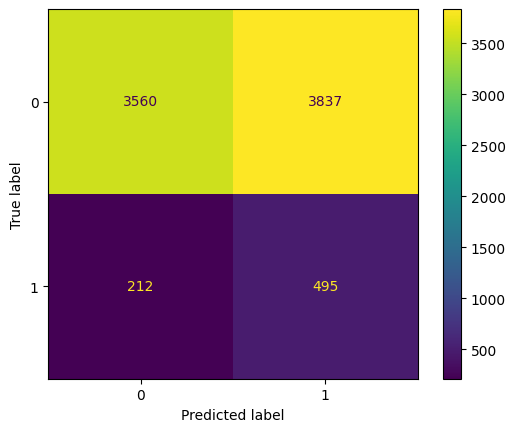

In [626]:
# Creamos nuestro modelo de √°rbol de decisi√≥n con una profundidad m√°xima de 10
modelo = DecisionTreeClassifier(max_depth=10)

# Entrenamos el modelo con los datos balanceados
modelo.fit(x_balanceada, y_balanceada)

# Realizamos predicciones usando el conjunto de prueba original
y_previsto = modelo.predict(X_test)

# Mostramos las m√©tricas de evaluaci√≥n: precisi√≥n, recall, f1-score y soporte
print(classification_report(y_test, y_previsto))

# Mostramos la matriz de confusi√≥n para visualizar el rendimiento del modelo
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto);

**Explicaci√≥n / An√°lisis de lo aprendido**

* En este bloque implementamos NearMiss (version=3), una t√©cnica de undersampling que reduce la clase mayoritaria seleccionando ejemplos que est√°n m√°s alejados de la clase minoritaria. Esto permite equilibrar las clases y que el modelo preste m√°s atenci√≥n a los casos minoritarios (clientes morosos).

* Al evaluar el modelo con el conjunto de prueba original, observamos:

>* Recall para la clase 1 (morosos) = 0.71 ‚Üí El modelo identifica correctamente el 71% de los clientes morosos, mejorando notablemente frente a otros enfoques anteriores.
>
>* Precision para la clase 1 = 0.12 ‚Üí Aunque detecta m√°s morosos, a√∫n tiene una alta tasa de falsos positivos.
>
>* F1-score para la clase 1 = 0.20 ‚Üí Se mantiene bajo debido a la baja precisi√≥n, aunque es un avance respecto a t√©cnicas previas.

* La matriz de confusi√≥n confirma que el modelo logra capturar m√°s verdaderos positivos (499 morosos correctamente detectados) comparado con resultados anteriores, aunque tambi√©n clasifica err√≥neamente muchos clientes no morosos como morosos.

* En conclusi√≥n, NearMiss con √°rbol de decisi√≥n ha sido la t√©cnica que mejor ha aumentado la capacidad del modelo para detectar morosos (recall alto), incluso sacrificando algo de precisi√≥n. Este comportamiento es deseable en escenarios donde es m√°s costoso no detectar un moroso que enviar una alerta falsa.

---
**En esta clase, aprendiste a:**
* Utilizar oversampling y undersampling en datos desbalanceados;
* Utilizar t√©cnicas de balanceo de datos y entender sus ventajas y desventajas;
* Aplicar un pipeline junto con la validaci√≥n cruzada;
* Probar modelos de clasificaci√≥n.
---

## Desaf√≠o: Hora de la pr√°ctica

Vamos a practicar el contenido que se present√≥ en la clase a partir de algunas actividades, pero utilizando un conjunto de datos diferente con datos de pacientes a ser diagnosticados con diabetes o no. Los desaf√≠os siguen una secuencia de tareas, sirviendo como un proyecto secundario. Para realizar los desaf√≠os, descarga la base de datos desde este [enlace](https://github.com/alura-es-cursos/2162-clasificacion-validacion-de-modelos-y-metricas/blob/desafios/diabetes.csv).



### 1) Clasificando Datos

>* **1 -** Para la construcci√≥n de un modelo de machine learning se necesitan datos. Como tarea inicial, realiza la lectura de la base de datos de diabetes y **divide los datos en variables explicativas y variable objetivo** (x e y). La variable objetivo es la columna que quieres clasificar, que contiene la informaci√≥n de si el paciente tiene o no diabetes. Las variables explicativas son todas las columnas excepto la de diabetes. La separaci√≥n de los datos se puede hacer con la selecci√≥n de columnas con pandas.
>
>* **2 -** Una etapa muy importante en proyectos de clasificaci√≥n es la validaci√≥n de los modelos, para identificar si hay una generalizaci√≥n del modelo para datos nuevos. **Realiza la divisi√≥n de los datos entre entrenamiento, validaci√≥n y prueba**. Utiliza el **5% de los datos para prueba** y con el resto, deja el **25% para validaci√≥n**. En el momento de la separaci√≥n, usa el par√°metro stratify a partir de la variable objetivo para mantener la proporci√≥n de los datos.
>
>* **3 -** **La etapa de modelado de datos consiste en utilizar un algoritmo capaz de identificar patrones en los datos y clasificar los valores**. A partir del modelo es posible extraer una tasa de acierto para entender su desempe√±o. Crea 2 modelos utilizando los algoritmos **DecisionTreeClassifier y RandomForestClassifier** y eval√∫a la precisi√≥n de entrenamiento y prueba, eligiendo el valor **3 para el par√°metro max_depth del algoritmo DecisionTreeClassifier** y el **valor 2 para el max_depth del algoritmo RandomForestClassifier**, para que los modelos no se especialicen demasiado en el patr√≥n de los datos de entrenamiento.
>
>* **4 -** La tasa de acierto generalmente no proporciona informaci√≥n suficiente para entender el comportamiento del modelo. La matriz de confusi√≥n es una herramienta m√°s completa, capaz de proporcionar los aciertos y errores del modelo para cada clase. **Construye una matriz de confusi√≥n para cada uno de los modelos para evaluar el desempe√±o de la predicci√≥n**. Para construir la matriz, usa el m√©todo predict para generar las predicciones de los valores y comparar con los valores reales de la base de datos.

#### Lectura de datos y separaci√≥n de variables explicativas y respuesta

In [627]:
import pandas as pd

In [628]:
url_desafio = 'https://raw.githubusercontent.com/DanielRaiicHu/clasificacion_validacion_y_metricas/main/diabetes.csv'
datos_desafio = pd.read_csv(url_desafio)
datos_desafio

glicemia  presion_sanguinea  grasa_subcutanea_triceps  insulina    imc  \
0          66                 23                        94      28.1  0.167   
1          40                 35                       168      43.1  2.288   
2          50                 32                        88      31.0  0.248   
3          70                 45                       543      30.5  0.158   
4          60                 23                       846      30.1  0.398   
..        ...                ...                       ...       ...    ...   
389        88                 44                       510      43.3  0.222   
390        88                 39                       110      36.5  1.057   
391        58                 26                        16      28.4  0.766   
392        76                 48                       180      32.9  0.171   
393        72                 23                       112      26.2  0.245   

     diabetes  
0           0  
1           1  
2           1  
3           1  
4           1  
..        ...  
389         1  
390         1  
391         0  
392         0  
393         0  

[394 rows x 6 columns]

In [629]:
X_desafio = datos_desafio.drop(columns='diabetes',axis=1)
y_desafio = datos_desafio['diabetes']

#### Divisi√≥n de Datos: Entrenamiento, Validaci√≥n y Prueba

In [630]:
from sklearn.model_selection import train_test_split

In [631]:
# Divisi√≥n inicial: General vs Prueba
X_desafio, X_test_desafio, y_desafio, y_test_desafio = train_test_split(X_desafio, y_desafio, test_size= 0.05, stratify = y_desafio, random_state = 5)

# Divisi√≥n secundaria: Entrenamiento vs Validaci√≥n
X_train_desafio, X_val_desafio, y_train_desafio, y_val_desafio = train_test_split(X_desafio, y_desafio, stratify = y_desafio, random_state = 5)

#### Modelos: DecisionTreeClassifier y RandomForestClassifier

In [632]:
# Modelo √Årbol
from sklearn.tree import DecisionTreeClassifier
modelo_arbol_desafio = DecisionTreeClassifier(max_depth=3) # L√≠mite de profundidad = 3
modelo_arbol_desafio.fit(X_train_desafio,y_train_desafio)                   # Vuelve a entrenar
print(f'La exactitud del Modelo de √Årbol con el conjunto de entrenamiento es de: {modelo_arbol_desafio.score(X_train_desafio,y_train_desafio)}')
print(f'La exactitud del Modelo de √Årbol con el conjunto de validaci√≥n es de: {modelo_arbol_desafio.score(X_val_desafio,y_val_desafio)}')

# Respuesta:
# La exactitud del Modelo con de √Årbol el conjunto de entrenamiento es de: 0.7571428571428571
# La exactitud del Modelo con de √Årbol el conjunto de validaci√≥n es de: 0.776595744680851

La exactitud del Modelo de √Årbol con el conjunto de entrenamiento es de: 0.7571428571428571
La exactitud del Modelo de √Årbol con el conjunto de validaci√≥n es de: 0.776595744680851


In [633]:
# Modelo Forest
from sklearn.ensemble import RandomForestClassifier
modelo_forest_desafio = RandomForestClassifier(max_depth=2) # L√≠mite de profundidad = 2
modelo_forest_desafio.fit(X_train_desafio,y_train_desafio)                   # Vuelve a entrenar
print(f'La exactitud del Modelo Forest con el conjunto de entrenamiento es de: {modelo_forest_desafio.score(X_train_desafio,y_train_desafio)}')
print(f'La exactitud del Modelo Forest con el conjunto de validaci√≥n es de: {modelo_forest_desafio.score(X_val_desafio,y_val_desafio)}')

# Respuesta:
# La exactitud del Modelo Forest con el conjunto de entrenamiento es de: 0.7285714285714285
# La exactitud del Modelo Forest con el conjunto de validaci√≥n es de: 0.7021276595744681

La exactitud del Modelo Forest con el conjunto de entrenamiento es de: 0.725
La exactitud del Modelo Forest con el conjunto de validaci√≥n es de: 0.6808510638297872


#### Matriz de Confusi√≥n

In [634]:
from sklearn.metrics import confusion_matrix

In [635]:
# Matriz de Confusi√≥n tipo Array - Modelo √Årbol
y_previsto_arbol_desafio = modelo_arbol_desafio.predict(X_val_desafio)
matriz_confusion_arbol_desafio = confusion_matrix(y_val_desafio,y_previsto_arbol_desafio)
print(matriz_confusion_arbol_desafio)

[[52 11]
 [10 21]]


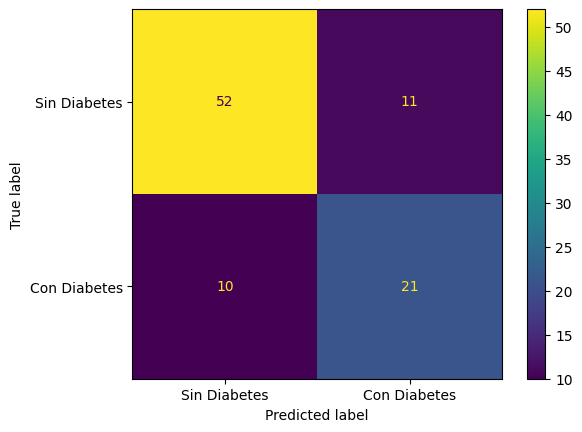

In [636]:
# Matriz de Confusi√≥n - Modelo √Årbol
visualizacion_arbol_desafio = ConfusionMatrixDisplay(
    confusion_matrix=matriz_confusion_arbol_desafio,
    display_labels=['Sin Diabetes', 'Con Diabetes']  # Etiquetas para las clases 0 y 1
)

visualizacion_arbol_desafio.plot();

In [637]:
# Matriz de Confusi√≥n tipo Array - Modelo Forest
y_previsto_forest_desafio = modelo_forest_desafio.predict(X_val_desafio)
matriz_confusion_forest_desafio = confusion_matrix(y_val_desafio,y_previsto_forest_desafio)
print(matriz_confusion_forest_desafio)

[[59  4]
 [26  5]]


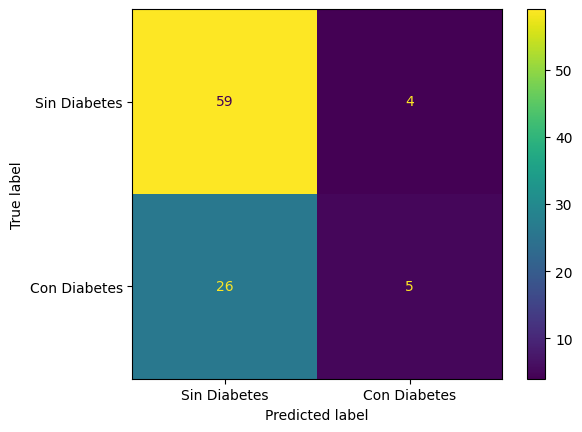

In [638]:
# Matriz de Confusi√≥n - Modelo Forest
visualizacion_forest_desafio = ConfusionMatrixDisplay(
    confusion_matrix=matriz_confusion_forest_desafio,
    display_labels=['Sin Diabetes', 'Con Diabetes']  # Etiquetas para las clases 0 y 1
)

visualizacion_forest_desafio.plot();

### 2) M√©tricas de evaluaci√≥n

**Estos desaf√≠os dependen del modelo generado en los desaf√≠os de la clase 1.**

**`1 -`** Para una evaluaci√≥n completa de un modelo de clasificaci√≥n, podemos explorar m√©tricas que eval√∫an la tasa de acierto general y tambi√©n para cada clase de la variable objetivo de forma individual. **`Extrae las m√©tricas de precisi√≥n, recall, accuracy y F1-Score de los modelos de clasificaci√≥n generados en el desaf√≠o de la clase 1.`** La biblioteca Scikit-Learn tiene funciones para calcular cada una de las m√©tricas, solo necesitas importar y utilizar como par√°metros los valores reales y previstos por el modelo.

**`2 -`** Adem√°s de m√©tricas num√©ricas, se pueden explorar gr√°ficos para evaluar el rendimiento de un modelo y comprender si puede diferenciar bien una clase de otra. **`Obt√©n la curva ROC y la m√©trica AUC`** de los modelos de clasificaci√≥n generados en el desaf√≠o de la clase 1, comparando las curvas en el mismo gr√°fico. La curva ROC se puede generar usando el m√©todo RocCurveDisplay.from_predictions.

**`3 -`** Adem√°s de la curva ROC, la curva de precisi√≥n x recall se puede usar para evaluar el rendimiento de modelos, siendo m√°s interesante para datos desbalanceados. **`Obt√©n la curva de precisi√≥n x recall y la m√©trica AP`** de los modelos de clasificaci√≥n generados en el desaf√≠o de la clase 1, comparando las curvas en el mismo gr√°fico. La curva de precisi√≥n x recall se puede generar usando el m√©todo PrecisionRecallDisplay.from_predictions.

**`4 -`** Un resumen de las principales m√©tricas de clasificaci√≥n puede ser muy √∫til para resumir la informaci√≥n y generar insights de forma r√°pida. **`Genera los informes de m√©tricas de los modelos de clasificaci√≥n construidos en el desaf√≠o de la clase 1`**. El informe de m√©tricas se puede generar a partir de la funci√≥n classification_report de la biblioteca Scikit-Learn.

#### Extraer M√©tricas: Precisi√≥n, Recall, Accuracy y F1

In [639]:
# Importamos las principales m√©tricas para modelos de clasificaci√≥n
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [640]:
# M√©tricas Modelo √Årbol
print(f'La precisi√≥n del modelo de √°rbol es: {precision_score(y_val_desafio,y_previsto_arbol_desafio)}')
print(f'La sensibilidad (recall) del modelo de √°rbol es: {recall_score(y_val_desafio,y_previsto_arbol_desafio)}')
print(f'La exactitud (accuracy) del modelo de √°rbol es: {accuracy_score(y_val_desafio,y_previsto_arbol_desafio)}')
print(f'El F1-Score del modelo de √°rbol es: {f1_score(y_val_desafio,y_previsto_arbol_desafio)}')

La precisi√≥n del modelo de √°rbol es: 0.65625
La sensibilidad (recall) del modelo de √°rbol es: 0.6774193548387096
La exactitud (accuracy) del modelo de √°rbol es: 0.776595744680851
El F1-Score del modelo de √°rbol es: 0.6666666666666666


In [641]:
# M√©tricas Modelo Forest
print(f'La precisi√≥n del modelo forest es: {precision_score(y_val_desafio,y_previsto_forest_desafio)}')
print(f'La sensibilidad (recall) del modelo forest es: {recall_score(y_val_desafio,y_previsto_forest_desafio)}')
print(f'La exactitud (accuracy) del modelo forest es: {accuracy_score(y_val_desafio,y_previsto_forest_desafio)}')
print(f'El F1-Score del modelo forest es: {f1_score(y_val_desafio,y_previsto_forest_desafio)}')

La precisi√≥n del modelo forest es: 0.5555555555555556
La sensibilidad (recall) del modelo forest es: 0.16129032258064516
La exactitud (accuracy) del modelo forest es: 0.6808510638297872
El F1-Score del modelo forest es: 0.25


#### Curva ROC y M√©trica AUC

In [642]:
# Importamos la herramienta para graficar la curva ROC
from sklearn.metrics import RocCurveDisplay
# Importamos la funci√≥n para calcular el √°rea bajo la curva ROC (AUC)
from sklearn.metrics import roc_auc_score

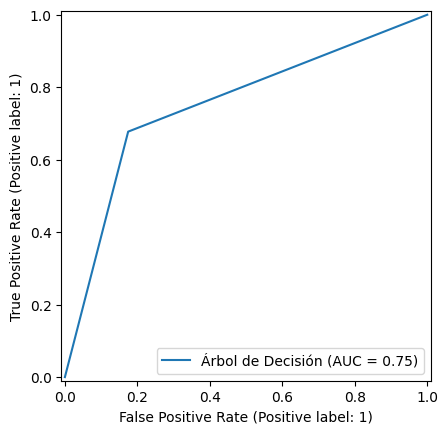

In [643]:
# Curva ROC Modelo √Årbol
RocCurveDisplay.from_predictions(y_val_desafio,y_previsto_arbol_desafio, name='√Årbol de Decisi√≥n');

In [644]:
# El √Årea Bajo la Curva (AUC) - Modelo √Årbol
print(f'El √°rea bajo la curva ROC del modelo de √°rbol es de: {roc_auc_score(y_val_desafio, y_previsto_arbol_desafio)}')

El √°rea bajo la curva ROC del modelo de √°rbol es de: 0.7514080901177674


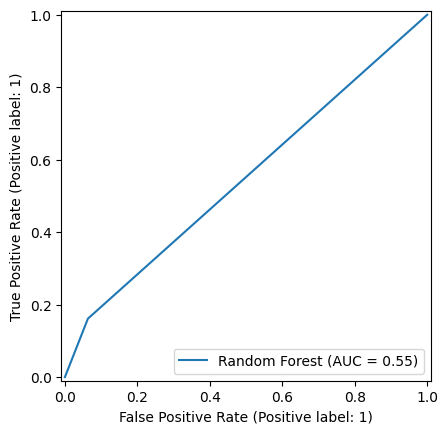

In [645]:
# Curva ROC Modelo Forest
RocCurveDisplay.from_predictions(y_val_desafio,y_previsto_forest_desafio, name='Random Forest');

In [646]:
# El √Årea Bajo la Curva (AUC) - Modelo Forest
print(f'El √°rea bajo la curva ROC del modelo forest es de: {roc_auc_score(y_val_desafio, y_previsto_forest_desafio)}')

El √°rea bajo la curva ROC del modelo forest es de: 0.5488991295442909


#### Curva de Precisi√≥n x Recall y M√©trica AP (Average Precision)

In [647]:
# Importamos la clase que permite graficar la curva Precisi√≥n vs Recall
from sklearn.metrics import PrecisionRecallDisplay

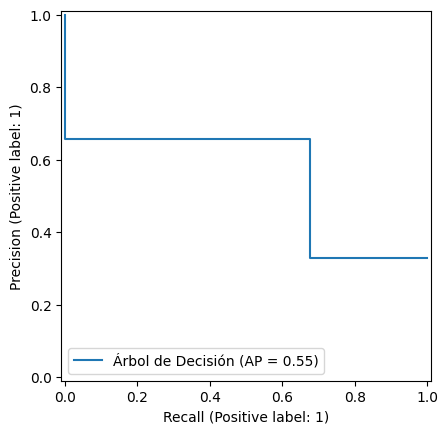

In [648]:
# Curva de Precisi√≥n x Recall - Modelo √Årbol
PrecisionRecallDisplay.from_predictions(y_val_desafio, y_previsto_arbol_desafio, name='√Årbol de Decisi√≥n');

In [649]:
# M√©trica AP - Modelo √Årbol
print(f'El score promedio de precisi√≥n vs recall para el modelo de √°rbol es de: {average_precision_score(y_val_desafio, y_previsto_arbol_desafio)}')

El score promedio de precisi√≥n vs recall para el modelo de √°rbol es de: 0.5509394303363074


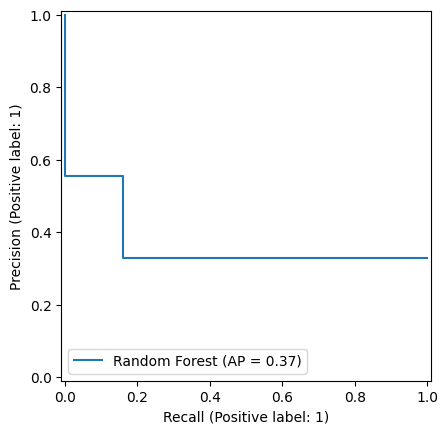

In [650]:
# Curva de Precisi√≥n x Recall - Modelo Forest
PrecisionRecallDisplay.from_predictions(y_val_desafio, y_previsto_forest_desafio, name='Random Forest');

In [651]:
# M√©trica AP - Modelo Forest
print(f'El score promedio de precisi√≥n vs recall para el modelo forest es de: {average_precision_score(y_val_desafio, y_previsto_forest_desafio)}')

El score promedio de precisi√≥n vs recall para el modelo forest es de: 0.3662014794478762


#### Informe de M√©tricas

In [652]:
# Informe de M√©tricas
from sklearn.metrics import classification_report

In [653]:
# Informe de M√©tricas para Modelo de √Årbol
print(f'Informe de M√©tricas para Modelo de √Årbol:\n\n{classification_report(y_val_desafio, y_previsto_arbol_desafio)}')

print('\n*******************************************************\n')

# Informe de M√©tricas para Modelo Forest
print(f'Informe de M√©tricas para Modelo Forest:\n\n{classification_report(y_val_desafio, y_previsto_forest_desafio)}')

Informe de M√©tricas para Modelo de √Årbol:

              precision    recall  f1-score   support

           0       0.84      0.83      0.83        63
           1       0.66      0.68      0.67        31

    accuracy                           0.78        94
   macro avg       0.75      0.75      0.75        94
weighted avg       0.78      0.78      0.78        94


*******************************************************

Informe de M√©tricas para Modelo Forest:

              precision    recall  f1-score   support

           0       0.69      0.94      0.80        63
           1       0.56      0.16      0.25        31

    accuracy                           0.68        94
   macro avg       0.62      0.55      0.52        94
weighted avg       0.65      0.68      0.62        94



### 3) Validaci√≥n Cruzada

**`1 -`** En el proceso de validaci√≥n cruzada, se generan diferentes modelos para cada divisi√≥n realizada en los datos y, en consecuencia, diferentes valores de m√©tricas de evaluaci√≥n. Para encontrar un resultado promedio de las m√©tricas, se puede construir un `intervalo de confianza` a partir de la media y la desviaci√≥n est√°ndar de las m√©tricas. Crea una funci√≥n para calcular el intervalo de confianza de los resultados de una validaci√≥n cruzada con 2 desviaciones est√°ndar. **`La funci√≥n necesita 2 par√°metros: uno para recibir una lista con los resultados de las m√©tricas de la validaci√≥n cruzada y otro para recibir el nombre del algoritmo`**. Para generar el intervalo de confianza, extrae la media de los resultados de la lista y la desviaci√≥n est√°ndar. El intervalo de confianza debe ser presentado en un print con el valor m√≠nimo siendo la media restada de 2 desviaciones est√°ndar y el valor m√°ximo siendo la media sumada de 2 desviaciones est√°ndar. Ejemplo de retorno de la funci√≥n:

`Intervalo de confianza ("nombre del modelo"): ["valor m√≠nimo del intervalo", "valor m√°ximo del intervalo"]`

**`2 -`** KFold es la estrategia m√°s simple de validaci√≥n cruzada, que permite la divisi√≥n aleatoria de los datos en k partes, siendo utilizada una parte para validaci√≥n y el resto para entrenamiento del modelo. El proceso de creaci√≥n de modelos se repite hasta que todas las partes son utilizadas como validaci√≥n. Sabiendo esto, `eval√∫a el desempe√±o de los modelos con un intervalo de confianza utilizando la validaci√≥n cruzada con el m√©todo KFold, usando 10 partes`, con el uso del par√°metro n_splits y mezclando los datos antes de la separaci√≥n con el par√°metro shuffle. `Usa el m√©todo cross_val_score que no retorna el tiempo de ejecuci√≥n, solo las m√©tricas.`

**`3 -`** En el proceso de divisi√≥n de datos con el KFold aleatorio, puede ser que la proporci√≥n de cada categor√≠a de la variable objetivo no se mantenga en cada una de las partes de los datos. Para mantener esa proporci√≥n en cada una de las partes, podemos `utilizar el KFold estratificado`, haciendo que el proceso de validaci√≥n de datos sea mucho m√°s consistente. Eval√∫a el desempe√±o de los modelos con un intervalo de confianza utilizando la validaci√≥n cruzada (cross_val_score) con el m√©todo StratifiedKFold, usando el par√°metro n_splits y mezclando los datos antes de la separaci√≥n con el par√°metro shuffle y evaluando la m√©trica **`F1-Score usando el par√°metro scoring`**.

**`4 -`** En conjuntos de datos con pocos registros (pocas filas), las estrategias de separaci√≥n de los datos para validaci√≥n pueden hacer que quede poca informaci√≥n en los datos de entrenamiento, haciendo que el modelo no comprenda bien el patr√≥n de los datos. El `LeaveOneOut` es una estrategia para sortear este problema, utilizando solo un registro como dato de validaci√≥n. Eval√∫a el desempe√±o de los modelos utilizando la validaci√≥n cruzada (cross_val_score) con el m√©todo LeaveOneOut.

El m√©todo LeaveOneOut generar√° un modelo para cada una de las filas de la base de datos, por lo tanto, la lista de resultados tendr√° tasa de acierto solo de 0 o 1 para cada modelo. De esta forma, extrae solo la media del resultado con el m√©todo mean(), sin utilizar el intervalo de confianza.

#### Intervalo de confianza con validaci√≥n cruzada

In [654]:
from sklearn.model_selection import KFold, cross_validate

In [655]:
kf_desafio = KFold(n_splits=10, shuffle=True, random_state = 5)

In [656]:
# M√©tricas Modelo √Årbol
cv_arbol_desafio = cross_validate(modelo_arbol_desafio, X_desafio, y_desafio, cv=kf_desafio)

In [657]:
# M√©tricas Modelo Random Forest
cv_forest_desafio = cross_validate(modelo_forest_desafio, X_desafio, y_desafio, cv=kf_desafio)

In [658]:
# Calcula el intervalo de confianza a partir de un diccionario de resultados.
# Usa el promedio y desviaci√≥n est√°ndar de los valores de test_score.
def intervalo_confianza_desafio_test_score(nombre_modelo, resultado):
  promedio = resultado['test_score'].mean()
  desvio_std = resultado['test_score'].std()
  print(f'El intervalo de confianza del Modelo {nombre_modelo} es de: {promedio-2*desvio_std},{min(promedio+2*desvio_std , 1)}')

In [659]:
# Intervalos de confianza para Modelos de √Årbol y Random Forest
intervalo_confianza_desafio_test_score('√Årbol de Decisi√≥n',cv_arbol_desafio)
intervalo_confianza_desafio_test_score('Random Forest',cv_forest_desafio)

El intervalo de confianza del Modelo √Årbol de Decisi√≥n es de: 0.5337181765177326,0.8684155361422958
El intervalo de confianza del Modelo Random Forest es de: 0.5935708529993637,0.7906396733164258


#### KFold

In [660]:
from sklearn.model_selection import KFold, cross_val_score

In [661]:
modelo_arbol_desafio = DecisionTreeClassifier(max_depth=3)
modelo_forest_desafio = RandomForestClassifier(max_depth = 2)
kf_desafio = StratifiedKFold(n_splits=10, shuffle=True, random_state=5, )

In [662]:
# Calcula el intervalo de confianza desde el modelo y los datos.
# Utiliza cross_val_score para obtener un array de resultados de test.

def intervalo_confianza_desafio_cv_score(nombre_modelo, modelo):
    resultado = cross_val_score(modelo, X_desafio, y_desafio, cv=kf_desafio)
    promedio = resultado.mean()
    desvio_std = resultado.std()
    print(f'El intervalo de confianza del Modelo {nombre_modelo} es de: {promedio-2*desvio_std:.4f}, {min(promedio+2*desvio_std , 1):.4f}')

In [663]:
intervalo_confianza_desafio_cv_score('√Årbol de Decisi√≥n', modelo_arbol_desafio,)
intervalo_confianza_desafio_cv_score('Random Forest', modelo_forest_desafio,)

El intervalo de confianza del Modelo √Årbol de Decisi√≥n es de: 0.6283, 0.7671
El intervalo de confianza del Modelo Random Forest es de: 0.6173, 0.7733


### StratifiedKFold

In [664]:
# Importamos StratifiedKFold, que mantiene la proporci√≥n de clases en cada fold
from sklearn.model_selection import StratifiedKFold

In [665]:
modelo_arbol_desafio = DecisionTreeClassifier(max_depth=3)
modelo_forest_desafio = RandomForestClassifier(max_depth = 2)
skf_desafio = StratifiedKFold(n_splits=10, shuffle=True, random_state=5, )

In [666]:
def intervalo_confianza_desafio_skf(nombre_modelo, modelo):
    f1_scores = cross_val_score(modelo, X_desafio, y_desafio, cv=skf_desafio, scoring='f1')
    promedio = f1_scores.mean()
    desvio_std = f1_scores.std()
    print(f'El intervalo de confianza del Modelo {nombre_modelo} (con F1-Scores) es de: {promedio-2*desvio_std:.4f}, {min(promedio+2*desvio_std , 1):.4f}')

In [667]:
intervalo_confianza_desafio_skf('√Årbol de Decisi√≥n', modelo_arbol_desafio,)
intervalo_confianza_desafio_skf('Random Forest', modelo_forest_desafio,)

El intervalo de confianza del Modelo √Årbol de Decisi√≥n (con F1-Scores) es de: 0.2717, 0.7462
El intervalo de confianza del Modelo Random Forest (con F1-Scores) es de: 0.1137, 0.5977


#### LeaveOneOut

In [668]:
from sklearn.model_selection import cross_val_score, LeaveOneOut

In [669]:
modelo_arbol_desafio = DecisionTreeClassifier(max_depth=3)
modelo_forest_desafio = RandomForestClassifier(max_depth = 2)
loo_desafio  = LeaveOneOut()

In [670]:
# Funci√≥n con LeaveOneOut que calcula el promedio de acierto
def promedio_desafio_con_loo(nombre_modelo, modelo):
    resultados = cross_val_score(modelo, X_desafio, y_desafio, cv=loo_desafio)
    promedio = resultados.mean()
    print(f'La precisi√≥n media del Modelo {nombre_modelo} con LeaveOneOut es: {promedio:.4f}')

In [671]:
promedio_desafio_con_loo('√Årbol de Decisi√≥n', modelo_arbol_desafio)
promedio_desafio_con_loo('Random Forest', modelo_forest_desafio)

La precisi√≥n media del Modelo √Årbol de Decisi√≥n con LeaveOneOut es: 0.7086
La precisi√≥n media del Modelo Random Forest con LeaveOneOut es: 0.6872


### 4) Balanceo de datos

* **`1 -`** El desbalanceo de los datos de la variable objetivo puede hacer que el modelo se incline a acertar los patrones de solo la categor√≠a que tiene mayor cantidad, haciendo necesario en algunos casos un tratamiento espec√≠fico de balanceo de datos. La etapa inicial es identificar si existe o no el desbalanceo de datos en la variable objetivo. Por eso, **`verifica la proporci√≥n`** de datos de la variable objetivo del conjunto de datos de diabetes. Este an√°lisis puede hacerse a partir del porcentaje de datos, `utilizando el m√©todo value_counts(normalize=True)` o con la utilizaci√≥n de un `gr√°fico de conteo, usando el gr√°fico countplot` de la biblioteca seaborn para entender si hay un desbalanceo de datos.

* **`2 -`** Al realizar el balanceo de datos en una validaci√≥n cruzada, es necesario utilizar un `pipeline`, para que los datos de validaci√≥n no sean balanceados, manteni√©ndose en el est√°ndar de los datos del mundo real. Utiliza un `pipeline que contenga el ajuste del modelo y el balanceo de los datos usando el oversampling con SMOTE, obteniendo la media del F1-Score de una validaci√≥n cruzada con StratifiedKFold.`

* **`3 -`** Adem√°s del oversampling, es posible utilizar la estrategia de `undersampling` para hacer el balanceo de los datos. A pesar de ser estrategias distintas, ambas requieren de un pipeline por tratarse de balanceo de datos en una validaci√≥n cruzada. Utiliza `un pipeline que contenga el ajuste del modelo y el balanceo de los datos usando el undersampling con NearMiss en su versi√≥n 3, obteniendo la media del F1-Score de una validaci√≥n cruzada con StratifiedKFold.`

* **`4 -`** Despu√©s de realizar diversas an√°lisis y mejorar el rendimiento de los modelos, llega la etapa final, que consiste en `seleccionar el modelo con mejor rendimiento y hacer la evaluaci√≥n final` en un conjunto de datos de prueba, que no ha sido visto durante el proceso de entrenamiento y validaci√≥n. Elige el modelo que obtuvo el mejor rendimiento al comparar las estrategias de oversampling y undersampling y entrena un modelo usando todos los datos con la mejor estrategia. `Realiza la evaluaci√≥n del modelo usando los datos de prueba` que fueron separados al inicio de los desaf√≠os, `obteniendo el informe de m√©tricas y matriz de confusi√≥n.`

#### Verificar Proporci√≥n

In [672]:
datos_desafio['diabetes'].value_counts()

diabetes
0    264
1    130
Name: count, dtype: int64

In [673]:
round(datos_desafio['diabetes'].value_counts(normalize=True),4) * 100

diabetes
0    67.01
1    32.99
Name: proportion, dtype: float64

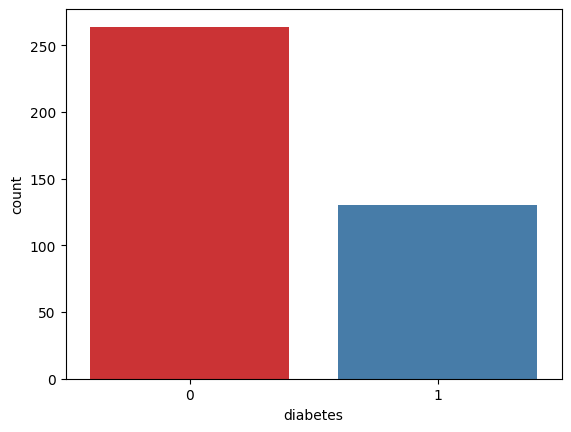

In [674]:
import seaborn as sns

sns.countplot(datos_desafio, x='diabetes', hue='diabetes', palette='Set1', legend=False);

In [675]:
import plotly.express as px

fig = px.histogram(datos_desafio, x='diabetes', color= 'diabetes', title="Proporci√≥n", width=700, height=400, pattern_shape='diabetes')
fig.show()
# px.histogram(datos_desafio, x='diabetes', color= 'diabetes', text_auto=True)

#### Oversampling

In [676]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

In [677]:
# Modelo √Årbol de Decisi√≥n
modelo_arbol_desafio = DecisionTreeClassifier(max_depth = 3)
pipeline_desafio_arbol = imbpipeline([('oversample', SMOTE()),('arbol', modelo_arbol_desafio)])
skf_desafio = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)
resultado_desafio_arbol = cross_val_score(pipeline_desafio_arbol, X_desafio, y_desafio, cv=skf_desafio, scoring='f1')
print(f'F1 de Modelo de √Årbol de Decisi√≥n es de: {resultado_desafio_arbol.mean()}')

F1 de Modelo de √Årbol de Decisi√≥n es de: 0.5453614368272813


In [678]:
# Modelo Random Forest
modelo_forest_desafio = RandomForestClassifier(max_depth = 2)
pipeline_desafio_forest = imbpipeline([('oversample', SMOTE()),('forest', modelo_forest_desafio)])
skf_desafio = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)
resultado_desafio_forest = cross_val_score(pipeline_desafio_forest, X_desafio, y_desafio, cv=skf_desafio, scoring='f1')
print(f'F1 de Modelo Random Forest es de: {resultado_desafio_forest.mean()}')

F1 de Modelo Random Forest es de: 0.6168981728210937


#### Undersampling

In [679]:
from imblearn.under_sampling import NearMiss

In [680]:
# Modelo √Årbol de Decisi√≥n
modelo_arbol_desafio = DecisionTreeClassifier(max_depth = 3)
pipeline_desafio_arbol = imbpipeline([('undersample', NearMiss(version = 3)),('arbol', modelo_arbol_desafio)])
skf_desafio = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)
resultado_desafio_arbol = cross_val_score(pipeline_desafio_arbol, X_desafio, y_desafio, cv=skf_desafio, scoring='f1')
print(f'F1 de Modelo de √Årbol de Decisi√≥n es de: {resultado_desafio_arbol.mean()}')

F1 de Modelo de √Årbol de Decisi√≥n es de: 0.5449681473471796


In [681]:
# Modelo Random Forest
modelo_forest_desafio = RandomForestClassifier(max_depth = 2)
pipeline_desafio_forest = imbpipeline([('undersample', NearMiss(version = 3)),('forest', modelo_forest_desafio)])
skf_desafio = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)
resultado_desafio_forest = cross_val_score(pipeline_desafio_forest, X_desafio, y_desafio, cv=skf_desafio, scoring='f1')
print(f'F1 de Modelo Random Forest es de: {resultado_desafio_forest.mean()}')

F1 de Modelo Random Forest es de: 0.6224205116362777


#### Evaluaci√≥n del mejor modelo usando el conjunto de prueba

              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.50      0.71      0.59         7

    accuracy                           0.65        20
   macro avg       0.65      0.66      0.64        20
weighted avg       0.70      0.65      0.66        20



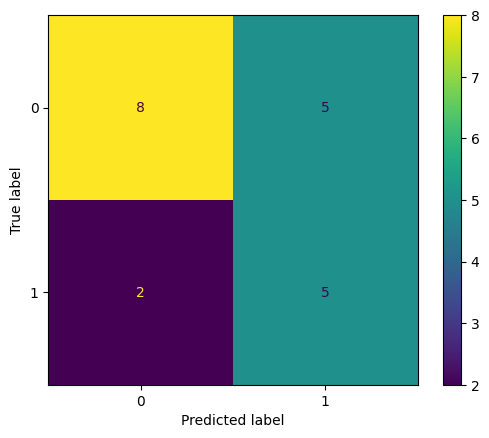

In [682]:
# Modelo Forest con undersampling usando NearMiss v3: reduce la clase mayoritaria conservando los casos m√°s ‚Äúdif√≠ciles‚Äù
undersample_desafio = NearMiss(version=3)

# Re-muestreo SOLO sobre el entrenamiento (evita contaminar el test)
x_balanceada_desafio, y_balanceada_desafio = undersample_desafio.fit_resample(X_desafio, y_desafio)

# Modelo: Random Forest (max_depth=2 para controlar complejidad). Recomendable fijar random_state.
modelo_forest_desafio = RandomForestClassifier(max_depth=2)

# Entrenamiento con datos ya balanceados por NearMiss
modelo_forest_desafio.fit(x_balanceada_desafio, y_balanceada_desafio)

# Predicci√≥n sobre el set de prueba original (sin aplicar ning√∫n re-muestreo)
y_previsto_forest_desafio = modelo_forest_desafio.predict(X_test_desafio)

# M√©tricas por clase (precisi√≥n, recall, F1) y promedios
print(classification_report(y_test_desafio, y_previsto_forest_desafio))

# Matriz de confusi√≥n (TN, FP, FN, TP) para diagn√≥stico r√°pido de errores
ConfusionMatrixDisplay.from_predictions(y_test_desafio, y_previsto_forest_desafio);

              precision    recall  f1-score   support

           0       0.75      0.69      0.72        13
           1       0.50      0.57      0.53         7

    accuracy                           0.65        20
   macro avg       0.62      0.63      0.63        20
weighted avg       0.66      0.65      0.65        20



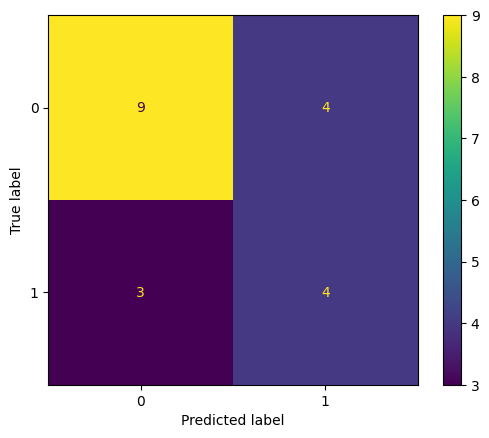

In [683]:
# Random Forest con Oversampling usando SMOTE: genera sint√©ticamente ejemplos de la clase minoritaria
modelo_base = RandomForestClassifier(random_state=5)

# Re-muestreo SOLO sobre el entrenamiento (evita data leakage)
oversample_desafio = SMOTE(random_state=5)
x_balanceada_desafio, y_balanceada_desafio = oversample_desafio.fit_resample(X_desafio, y_desafio)

# Entrenamiento con datos balanceados artificialmente por SMOTE
modelo_base.fit(x_balanceada_desafio, y_balanceada_desafio)

# Predicci√≥n sobre el set de prueba original (sin re-muestreo)
y_previsto_smote_desafio = modelo_base.predict(X_test_desafio)

# M√©tricas por clase (precisi√≥n, recall, F1) y promedios
print(classification_report(y_test_desafio, y_previsto_smote_desafio))

# Matriz de confusi√≥n (TN, FP, FN, TP) para an√°lisis de aciertos y errores
ConfusionMatrixDisplay.from_predictions(y_test_desafio, y_previsto_smote_desafio);